Hi Alphonso, thank you for submitting the project! 😊 I can see your code now. For further clarity or improvements, consider scheduling a 1:1 session with your tutor for personalized guidance. Keep up the great effort!

<b>Hi Alphonso,Thank you for submitting the project! 😊 I am unable to see the results of your code snippets. Please ensure that all the cells are run, resolve any errors if they occur, and then resubmit. All the best with your revisions!


Hello Alphonso,

You’ve submitted another project—great work! Your commitment to pushing through the challenges of this program is admirable.

After reviewing your submission, I’ve returned it with some feedback to help you make the necessary improvements. You can find my general feedback on the platform, with more detailed notes within your project file in the ‘Comments’ section.

What Was Great:
	•	You’ve shown good progress in handling data preprocessing and feature preparation.
	•	Your approach to model training, including tracking training and prediction time, is a valuable step for model efficiency evaluation.

Areas to Improve:

	1.	Data Preprocessing / EDA:
	•	Duplicate Check: Great job on dropping duplicates to ensure clean data.
	•	Null Check: Dropping rows with missing values works, but consider imputation for categorical features (e.g., mode imputation) if missing data is non-trivial.
	•	Outlier Detection: Your visual inspection of features like price and mileage is helpful. You may want to test your models with and without extreme outliers to assess their impact.
	•	Column Drop: Dropping unnecessary columns (e.g., datecrawled) is crucial for reducing noise.
    
	2.	Feature Preparation:
    
	•	Encoding Categorical Variables: You’re using pd.get_dummies to one-hot encode categorical variables, which is suitable for models like Random Forest and XGBoost. For models like CatBoost and LightGBM, you can leave categorical features as is, as they handle them natively.
	•	Scaling Numeric Features: Scaling with StandardScaler is important for linear models but may not be necessary for tree-based models like Random Forest or XGBoost.
    
	3.	Model Training:
	•	Training and Prediction Timing: You’re correctly tracking the training and prediction time, which is important for assessing the efficiency of your models.
	•	Evaluation with RMSE: You’re using RMSE correctly for evaluating model performance on validation and test sets.
	4.	Modeling with Various Algorithms:
	•	Linear Regression (LR): Great baseline model to start with, though it might not perform as well with complex relationships.
	•	Random Forest (RF): Hyperparameter tuning using RandomizedSearchCV is spot on. Keep an eye on overfitting with higher n_estimators or max_depth values.
	•	LightGBM (LGBM): Excellent for large datasets. Ensure thorough hyperparameter tuning.
	•	CatBoost: A good choice for categorical data, but make sure to fine-tune its parameters to improve model performance.
	•	XGBoost: Efficient and performs well with hyperparameter tuning, similar to the other models.
    
	5.	Suggestions:
	•	Cross-validation: Implement cross-validation (e.g., cross_val_score or KFold) to ensure your models generalize well and don’t overfit to the training data.
	•	Feature Engineering: Consider exploring advanced feature engineering techniques, such as interaction terms or polynomial features, to enhance model performance.
	•	Ensemble Methods: Combining predictions from multiple models (e.g., stacking, boosting) could provide better generalization, especially if you combine models like Random Forest, LightGBM, and XGBoost.
	•	Model Selection: After tuning all models, evaluate their performance on the test set and choose the one with the best balance between performance and speed.
	6.	Final Model Evaluation:
Once you’ve completed hyperparameter tuning for all models, select the one with the best RMSE on the test set. Ensure that the chosen model’s prediction speed meets the app’s performance requirements

Next Steps:
Please run all cells in your notebook to ensure everything is functioning correctly and then resubmit the project after addressing the points above. I’m confident you can refine the project and make it even better! Keep going—you’re doing great! 
🏄



<b>Project Owner Questions:<b>
- 1. Do you want me to address the points under your 'suggestions' section or both the 'suggestions' & 'Areas to improve' sections?
    
- 2. For your suggestion under 'Ensemble Methods', where you suggest 'Combining predictions from multiple models', is this a boosting technique? if so, I thought that's what the Light GBM, Catboost and XGBoost models did on their own?
    
- 3. For your suggestion under 'Final Model Evaluation', the project description didn't include explicit app performance requirements. The instructions reads to 'analyze the speed and quality of the models'. If there are explicit instructions, where would I need to look in order to find them?
    

## Goal:
---
Rusty Bargain used car sales service is developing an app to attract new customers. In that app, you can quickly find out the market value of your car. You need to build the model to determine the value using historical data: technical specifications, trim versions, and prices. 

Rusty Bargain is interested in:

- the quality of the prediction;
- the speed of the prediction;
- the time required for training

### Stages:
1. Data Preprocessing: Clean and organize the data, ensuring it's ready for analysis.
2. Exploratory Data Analysis (EDA): Perform an initial analysis to understand the data distribution and identify key trends.
3. ID Target/Feature Variables: Find out exactly what variable is being tested.
4. Split Dataset: Split dataset up into training, validating & test sets.
5. Scale Numeric Features: Set all of the feature variables on equal fields.
6. Determine Best Model: Train, fine tune, & evaluate the appropriate models for the task.

## Import Libraries

In [1]:
import math
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.utils import resample
from scipy.stats import randint, uniform

## Load Dataset

In [2]:
cars_df = pd.read_csv('/datasets/car_data.csv')

### Display first 5 rows of dataset

In [3]:
cars_df.head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17


### Display column data types & count

In [4]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

### Display descriptive stats of numerical variables within dataset

In [5]:
cars_df.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [6]:
cars_df = cars_df.rename(columns=lambda x: x.lower()) # Convert column names to lowercase

## Data preprocessing/EDA

### Duplicates Check

In [7]:
cars_df.duplicated().sum()

262

### Duplicates Deletion

In [8]:
cars_df = cars_df.drop_duplicates()  # Drop duplicate rows
cars_df.duplicated().sum()

0

### Null Check

In [9]:
cars_df.isna().sum()

datecrawled              0
price                    0
vehicletype          37484
registrationyear         0
gearbox              19830
power                    0
model                19701
mileage                  0
registrationmonth        0
fueltype             32889
brand                    0
notrepaired          71145
datecreated              0
numberofpictures         0
postalcode               0
lastseen                 0
dtype: int64

### Null Deletion

In [10]:
cars_df = cars_df.dropna()  # Drop rows with missing values
cars_df.isna().sum()

datecrawled          0
price                0
vehicletype          0
registrationyear     0
gearbox              0
power                0
model                0
mileage              0
registrationmonth    0
fueltype             0
brand                0
notrepaired          0
datecreated          0
numberofpictures     0
postalcode           0
lastseen             0
dtype: int64

### Remove columns/features that don't contribute to model

Since the main goal behind a machine learning model is to produce the most accurate predictions, only the most relevant columns/features need to be considered that directly help in that prediction.

In [11]:
cars_df = cars_df.drop(columns=['datecrawled', 'datecreated', 'lastseen', 'numberofpictures'])  # Drop specific columns
cars_df.head(5)

,price,vehicletype,registrationyear,gearbox,power,model,mileage,registrationmonth,fueltype,brand,notrepaired,postalcode
3,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,91074
4,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,60437
5,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,33775
6,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,67112
7,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,19348


After dropping the columns that don't seem to add any value to the quality or level of predicting the price of a car. The columns left within the dataframe that contain null values are: 'vehicletype', 'gearbox', 'model', 'fueltype', & 'notrepaired' columns. Looking at a snippet of the dataframe now, it appears the variables/features that are categorical are 'vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired'.

### Outlier Detection

<AxesSubplot:>

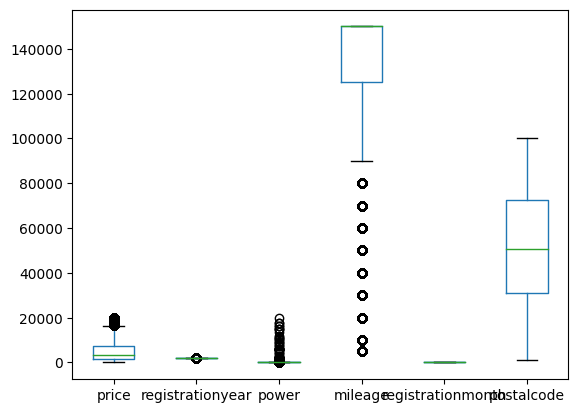

In [12]:
cars_df.plot(kind='box')

Within the current dataset, there are outliers present, but given the context surrounding it, they should remain. For instance, some used cars may have mileage that are higher than the norm due to the fact that some drivers drive more than others. It is those types of drivers and drivers that rarely drive their vehicle that will consider this app for their car valuation. With that being, these anamolies should be kept for model training.

## Feature prep

### Encode Categorical Variables

In [13]:
cars_df_ohe = pd.get_dummies(cars_df, columns=['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired'], drop_first=True)
cars_df_ohe

,price,registrationyear,power,mileage,registrationmonth,postalcode,vehicletype_convertible,vehicletype_coupe,vehicletype_other,vehicletype_sedan,...,brand_seat,brand_skoda,brand_smart,brand_subaru,brand_suzuki,brand_toyota,brand_trabant,brand_volkswagen,brand_volvo,notrepaired_yes
3,1500,2001,75,150000,6,91074,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,3600,2008,69,90000,7,60437,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
5,650,1995,102,150000,10,33775,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
6,2200,2004,109,150000,8,67112,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,1980,50,40000,7,19348,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354360,3999,2005,3,150000,5,81825,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354362,3200,2004,225,150000,5,96465,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
354363,1150,2000,0,150000,3,26624,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
354366,1199,2000,101,125000,3,26135,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Define Features & Target/Split Set/Scale Features

In [14]:
X = cars_df[['vehicletype', 'registrationyear', 'registrationmonth', 'gearbox', 'power', 'model', 'fueltype', 'brand', 'notrepaired', 'postalcode','mileage']]
y = cars_df['price']

In [15]:
y_ohe = cars_df_ohe['price']
x_ohe = cars_df_ohe.drop(columns =['price'], axis=1)

## Model training

In [16]:
def train_pred_eval(model, x, y, cv_splits=5, **kwargs):
    # Initialize the model with optional hyperparameters
    model_instance = model(**kwargs)
    
    # Define K-Fold Cross-Validator
    kf = KFold(n_splits=cv_splits, shuffle=True, random_state=42)
    
    # Cross-Validation
    cv_mse_scores = cross_val_score(model_instance, x, y, cv=kf, scoring='neg_mean_squared_error')
    cv_rmse_scores = np.sqrt(-cv_mse_scores)
    print("Cross-Validation RMSE Scores:", cv_rmse_scores)
    print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())
    print("Standard Deviation of Cross-Validation RMSE:", cv_rmse_scores.std())

    # split data into training and validation sets
    train_x, x_rem, train_y, y_rem = train_test_split(x, y, test_size=0.40, random_state=42)
    valid_x, test_x, valid_y, test_y = train_test_split(x_rem, y_rem, test_size=0.50, random_state=42)

    
    # Train the model on the entire training set and measure the training time
    start_time = time.time()
    model_instance.fit(train_x, train_y)
    training_time = time.time() - start_time
    print(f"Training time: {training_time} seconds")
    
    # Validate the model and measure the prediction time
    start_time = time.time()
    pred_y_val = model_instance.predict(valid_x)
    validation_time = time.time() - start_time
    print(f"Validation prediction time: {validation_time} seconds")
    
    # Calculate RMSE for validation
    rmse_val = mean_squared_error(valid_y, pred_y_val, squared=False)
    print(f"Validation RMSE: {rmse_val}")
    
    # Test the model and measure the prediction time
    start_time = time.time()
    pred_y_test = model_instance.predict(test_x)
    test_prediction_time = time.time() - start_time
    print(f"Test prediction time: {test_prediction_time} seconds")
    
    # Calculate RMSE for test
    rmse_test = mean_squared_error(test_y, pred_y_test, squared=False)
    print(f"Test RMSE: {rmse_test}")

    return {
        'training_time': training_time,
        'validation_time': validation_time,
        'validation_rmse': rmse_val,
        'test_prediction_time': test_prediction_time,
        'test_rmse': rmse_test,
        'cv_rmse_scores': cv_rmse_scores,
        'mean_cv_rmse': cv_rmse_scores.mean(),
        'std_cv_rmse': cv_rmse_scores.std()
    }

In [17]:
def train_pred_eval_lgbm(model, x, y, cv_splits=5, categorical_features=None, **kwargs):
    # initialize the model
    model_instance = model(**kwargs)

    # define K-Fold cross-validator
    kf = KFold(n_splits=cv_splits, shuffle=True, random_state=42)

    # cross-validation with LightGBM
    def lgb_cv(model_instance, x, y, cv_splits, categorical_features):
        cv_rmse_scores = []
        for train_index, val_index in kf.split(x):
            x_train, x_val = x.iloc[train_index], x.iloc[val_index]
            y_train, y_val = y.iloc[train_index], y.iloc[val_index]

            train_data = lgb.Dataset(x_train, label=y_train, categorical_feature=categorical_features)
            val_data = lgb.Dataset(x_val, label=y_val, reference=train_data, categorical_feature=categorical_features)

            model_instance.fit(x_train, y_train, eval_set=[(x_val, y_val)], early_stopping_rounds=10, verbose=False, categorical_feature=categorical_features)
            y_pred_val = model_instance.predict(x_val, num_iteration=model_instance.best_iteration_)

            rmse_val = np.sqrt(mean_squared_error(y_val, y_pred_val))
            cv_rmse_scores.append(rmse_val)
        
        return np.array(cv_rmse_scores)

    cv_rmse_scores = lgb_cv(model_instance, x, y, cv_splits, categorical_features)
    print("Cross-Validation RMSE Scores:", cv_rmse_scores)
    print("Mean Cross-Validation RMSE:", cv_rmse_scores.mean())
    print("Standard Deviation of Cross-Validation RMSE:", cv_rmse_scores.std())

    # split data into training and validation sets
    train_x, x_rem, train_y, y_rem = train_test_split(x, y, test_size=0.40, random_state=42)
    valid_x, test_x, valid_y, test_y = train_test_split(x_rem, y_rem, test_size=0.50, random_state=42)

    # train the model & record the training time
    start_time = time.time()
    model_instance.fit(train_x, train_y, eval_set=[(valid_x, valid_y)], early_stopping_rounds=10, verbose=False, categorical_feature=categorical_features)
    training_time = time.time() - start_time
    print(f"Training time: {training_time} seconds")

    # validate the model & record the prediction time
    start_time = time.time()
    pred_y_val = model_instance.predict(valid_x, num_iteration=model_instance.best_iteration_)
    validation_time = time.time() - start_time
    print(f"Validation prediction time: {validation_time} seconds")

    # calculate RMSE for validation
    rmse_val = np.sqrt(mean_squared_error(valid_y, pred_y_val))
    print(f"Validation RMSE: {rmse_val}")

    # test the model & record the prediction time
    start_time = time.time()
    pred_y_test = model_instance.predict(test_x, num_iteration=model_instance.best_iteration_)
    test_prediction_time = time.time() - start_time
    print(f"Test prediction time: {test_prediction_time} seconds")

    # calculate RMSE for test
    rmse_test = np.sqrt(mean_squared_error(test_y, pred_y_test))
    print(f"Test RMSE: {rmse_test}")

    return {
        'training_time': training_time,
        'validation_time': validation_time,
        'validation_rmse': rmse_val,
        'test_prediction_time': test_prediction_time,
        'test_rmse': rmse_test,
        'cv_rmse_scores': cv_rmse_scores,
        'mean_cv_rmse': cv_rmse_scores.mean(),
        'std_cv_rmse': cv_rmse_scores.std()
    }

### LR Model (used as a sanity check/reference)

In [18]:
train_pred_eval(LinearRegression, x_ohe, y_ohe, cv_splits=5)

Cross-Validation RMSE Scores: [2720.34965325 2713.89301841 2722.9869927  2709.64935225 2746.13702762]
Mean Cross-Validation RMSE: 2722.603208844007
Standard Deviation of Cross-Validation RMSE: 12.670724108413575
Training time: 5.084500312805176 seconds
Validation prediction time: 0.11524057388305664 seconds
Validation RMSE: 2712.5318692747637
Test prediction time: 0.18185997009277344 seconds
Test RMSE: 2716.1342597155726


{'training_time': 5.084500312805176,
 'validation_time': 0.11524057388305664,
 'validation_rmse': 2712.5318692747637,
 'test_prediction_time': 0.18185997009277344,
 'test_rmse': 2716.1342597155726,
 'cv_rmse_scores': array([2720.34965325, 2713.89301841, 2722.9869927 , 2709.64935225,
        2746.13702762]),
 'mean_cv_rmse': 2722.603208844007,
 'std_cv_rmse': 12.670724108413575}

### Initial RF Model

In [19]:
train_pred_eval(RandomForestRegressor, x_ohe, y_ohe, cv_splits=5, random_state=42)

Cross-Validation RMSE Scores: [1592.60517498 1576.62286613 1623.35754347 1581.94323305 1620.2904273 ]
Mean Cross-Validation RMSE: 1598.9638489869315
Standard Deviation of Cross-Validation RMSE: 19.386226502362558
Training time: 171.4957115650177 seconds
Validation prediction time: 1.7912344932556152 seconds
Validation RMSE: 1619.8383722236697
Test prediction time: 1.7741107940673828 seconds
Test RMSE: 1635.4340026719017


{'training_time': 171.4957115650177,
 'validation_time': 1.7912344932556152,
 'validation_rmse': 1619.8383722236697,
 'test_prediction_time': 1.7741107940673828,
 'test_rmse': 1635.4340026719017,
 'cv_rmse_scores': array([1592.60517498, 1576.62286613, 1623.35754347, 1581.94323305,
        1620.2904273 ]),
 'mean_cv_rmse': 1598.9638489869315,
 'std_cv_rmse': 19.386226502362558}

### RF Hyperparameter Tuning

In [37]:
# split data into training and validation sets
x_train_ohe, x_rem, y_train_ohe, y_rem = train_test_split(x_ohe, y_ohe, test_size=0.40, random_state=42)
x_valid_ohe, x_test_ohe, y_valid_ohe, y_test_ohe = train_test_split(x_rem, y_rem, test_size=0.50, random_state=42)

In [35]:
# split data into training and validation sets
x_train, x_rem, y_train, y_rem = train_test_split(X, y, test_size=0.40, random_state=42)
x_valid, x_test, y_valid, y_test = train_test_split(x_rem, y_rem, test_size=0.50, random_state=42)

In [22]:
# converted DataFrame to NumPy array in an attempt to decrease overall model tuning time
x_train_array_ohe = x_train_ohe.to_numpy()
y_train_array_ohe = y_train_ohe.to_numpy()

In [23]:
# define the RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42, warm_start=True)

# define the parameter distribution using scipy's randint for random sampling
param_dist = {
    'n_estimators': randint(50, 150),
    'max_depth': [None, 10, 20],
    'min_samples_split': randint(2, 6),
    'min_samples_leaf': randint(1, 5)
}

# setup RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_dist,
    n_iter=20,  # Reduced number of iterations
    cv=3,  # Reduced number of cross-validation folds
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,  # Use all available cores
    verbose=2,
    random_state=42
)

# fit the model
rf_random_search.fit(x_train_array_ohe, y_train_array_ohe)

# print the best parameters and score
print(f"Best Parameters: {rf_random_search.best_params_}")
print(f"Best Score: {rf_random_search.best_score_:.4f}")


Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=64; total time= 1.5min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=64; total time= 1.6min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=64; total time= 1.6min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time= 1.7min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time= 1.5min
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=70; total time= 1.0min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=136; total time= 2.0min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=136; total time= 2.0min
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=4, n_estimators=136; total time= 2.0min
[CV] END max_depth=20, min_samples_l

### Tuned RF Model

In [24]:
train_pred_eval(RandomForestRegressor, x_ohe, y_ohe, cv_splits=5, min_samples_leaf=1, min_samples_split=5, n_estimators=107, random_state=42)

Cross-Validation RMSE Scores: [1591.88843403 1572.90363437 1620.43882457 1582.36203769 1616.71529678]
Mean Cross-Validation RMSE: 1596.8616454897162
Standard Deviation of Cross-Validation RMSE: 18.75637810608607
Training time: 175.51081347465515 seconds
Validation prediction time: 1.6134088039398193 seconds
Validation RMSE: 1616.4487461999909
Test prediction time: 1.6199262142181396 seconds
Test RMSE: 1633.4989706293793


{'training_time': 175.51081347465515,
 'validation_time': 1.6134088039398193,
 'validation_rmse': 1616.4487461999909,
 'test_prediction_time': 1.6199262142181396,
 'test_rmse': 1633.4989706293793,
 'cv_rmse_scores': array([1591.88843403, 1572.90363437, 1620.43882457, 1582.36203769,
        1616.71529678]),
 'mean_cv_rmse': 1596.8616454897162,
 'std_cv_rmse': 18.75637810608607}

### Initial LightGBM Model

In [25]:
categorical_features = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired']
for feature in categorical_features:
    X[feature] = X[feature].astype('category')

train_pred_eval_lgbm(lgb.LGBMRegressor, X, y, cv_splits=5, categorical_features=categorical_features, objective= 'regression',
    metric= 'rmse',
    boosting_type= 'gbdt', random_state=42)


/tmp/ipykernel_78/777906463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = X[feature].astype('category')
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning(

Cross-Validation RMSE Scores: [1655.65147332 1643.67780903 1673.84234528 1646.88369695 1677.90652697]
Mean Cross-Validation RMSE: 1659.5923703100586
Standard Deviation of Cross-Validation RMSE: 13.919658250404405


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2068: UserWarning: catego

Training time: 2.298672676086426 seconds
Validation prediction time: 0.38285374641418457 seconds
Validation RMSE: 1645.464939464531
Test prediction time: 0.3056056499481201 seconds
Test RMSE: 1671.1684821667957


{'training_time': 2.298672676086426,
 'validation_time': 0.38285374641418457,
 'validation_rmse': 1645.464939464531,
 'test_prediction_time': 0.3056056499481201,
 'test_rmse': 1671.1684821667957,
 'cv_rmse_scores': array([1655.65147332, 1643.67780903, 1673.84234528, 1646.88369695,
        1677.90652697]),
 'mean_cv_rmse': 1659.5923703100586,
 'std_cv_rmse': 13.919658250404405}

### Light GBM Hyperparameter Tuning

In [26]:
# Define categorical features
categorical_features = ['vehicletype', 'gearbox', 'model', 'fueltype', 'brand', 'notrepaired']

# Convert categorical features to 'category' dtype for LightGBM
for feature in categorical_features:
    X[feature] = X[feature].astype('category')

# Define the LightGBM model
lgb_model = lgb.LGBMRegressor(random_state=42, n_jobs=-1)

# Define the parameter grid
param_grid = {
    'num_leaves': randint(20, 50),
    'max_depth': [-1, 5, 10, 20],
    'learning_rate': uniform(0.01, 0.2),
    'n_estimators': randint(50, 300),
    'subsample': uniform(0.7, 0.3),
    'colsample_bytree': uniform(0.7, 0.3),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1)
}

# Get categorical feature indices
categorical_feature_indices = [X.columns.get_loc(col) for col in categorical_features]

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=50,
    cv=5,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit the model
random_search.fit(X, y, categorical_feature=categorical_feature_indices)

# Best parameters
print("Best parameters found: ", random_search.best_params_)
print(f"Best Score: {random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/tmp/ipykernel_78/3696249856.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[feature] = X[feature].astype('category')
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=10, n_estimators=121, num_leaves=48, reg_alpha=0.596850157946487, reg_lambda=0.44583275285359114, subsample=0.7299924747454009; total time=   3.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=10, n_estimators=121, num_leaves=48, reg_alpha=0.596850157946487, reg_lambda=0.44583275285359114, subsample=0.7299924747454009; total time=   3.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=10, n_estimators=121, num_leaves=48, reg_alpha=0.596850157946487, reg_lambda=0.44583275285359114, subsample=0.7299924747454009; total time=   3.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=10, n_estimators=121, num_leaves=48, reg_alpha=0.596850157946487, reg_lambda=0.44583275285359114, subsample=0.7299924747454009; total time=   3.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8123620356542087, learning_rate=0.20014286128198325, max_depth=10, n_estimators=121, num_leaves=48, reg_alpha=0.596850157946487, reg_lambda=0.44583275285359114, subsample=0.7299924747454009; total time=   3.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8377746675897602, learning_rate=0.07674172222780437, max_depth=20, n_estimators=201, num_leaves=22, reg_alpha=0.020584494295802447, reg_lambda=0.9699098521619943, subsample=0.9497327922401264; total time=   4.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8377746675897602, learning_rate=0.07674172222780437, max_depth=20, n_estimators=201, num_leaves=22, reg_alpha=0.020584494295802447, reg_lambda=0.9699098521619943, subsample=0.9497327922401264; total time=   4.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8377746675897602, learning_rate=0.07674172222780437, max_depth=20, n_estimators=201, num_leaves=22, reg_alpha=0.020584494295802447, reg_lambda=0.9699098521619943, subsample=0.9497327922401264; total time=   4.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8377746675897602, learning_rate=0.07674172222780437, max_depth=20, n_estimators=201, num_leaves=22, reg_alpha=0.020584494295802447, reg_lambda=0.9699098521619943, subsample=0.9497327922401264; total time=   4.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8377746675897602, learning_rate=0.07674172222780437, max_depth=20, n_estimators=201, num_leaves=22, reg_alpha=0.020584494295802447, reg_lambda=0.9699098521619943, subsample=0.9497327922401264; total time=   4.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7637017332034828, learning_rate=0.04636499344142013, max_depth=-1, n_estimators=210, num_leaves=31, reg_alpha=0.6116531604882809, reg_lambda=0.007066305219717406, subsample=0.7069187275124247; total time=   6.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7637017332034828, learning_rate=0.04636499344142013, max_depth=-1, n_estimators=210, num_leaves=31, reg_alpha=0.6116531604882809, reg_lambda=0.007066305219717406, subsample=0.7069187275124247; total time=   6.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7637017332034828, learning_rate=0.04636499344142013, max_depth=-1, n_estimators=210, num_leaves=31, reg_alpha=0.6116531604882809, reg_lambda=0.007066305219717406, subsample=0.7069187275124247; total time=   6.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7637017332034828, learning_rate=0.04636499344142013, max_depth=-1, n_estimators=210, num_leaves=31, reg_alpha=0.6116531604882809, reg_lambda=0.007066305219717406, subsample=0.7069187275124247; total time=   6.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7637017332034828, learning_rate=0.04636499344142013, max_depth=-1, n_estimators=210, num_leaves=31, reg_alpha=0.6116531604882809, reg_lambda=0.007066305219717406, subsample=0.7069187275124247; total time=   5.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8574323980775167, learning_rate=0.08997219434305109, max_depth=20, n_estimators=269, num_leaves=47, reg_alpha=0.3663618432936917, reg_lambda=0.45606998421703593, subsample=0.935552788417904; total time=   6.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8574323980775167, learning_rate=0.08997219434305109, max_depth=20, n_estimators=269, num_leaves=47, reg_alpha=0.3663618432936917, reg_lambda=0.45606998421703593, subsample=0.935552788417904; total time=   7.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8574323980775167, learning_rate=0.08997219434305109, max_depth=20, n_estimators=269, num_leaves=47, reg_alpha=0.3663618432936917, reg_lambda=0.45606998421703593, subsample=0.935552788417904; total time=   6.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8574323980775167, learning_rate=0.08997219434305109, max_depth=20, n_estimators=269, num_leaves=47, reg_alpha=0.3663618432936917, reg_lambda=0.45606998421703593, subsample=0.935552788417904; total time=   6.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8574323980775167, learning_rate=0.08997219434305109, max_depth=20, n_estimators=269, num_leaves=47, reg_alpha=0.3663618432936917, reg_lambda=0.45606998421703593, subsample=0.935552788417904; total time=   6.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7599021346475079, learning_rate=0.11284688768272232, max_depth=20, n_estimators=298, num_leaves=22, reg_alpha=0.8599404067363206, reg_lambda=0.6803075385877797, subsample=0.8351497755908628; total time=   5.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7599021346475079, learning_rate=0.11284688768272232, max_depth=20, n_estimators=298, num_leaves=22, reg_alpha=0.8599404067363206, reg_lambda=0.6803075385877797, subsample=0.8351497755908628; total time=   6.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7599021346475079, learning_rate=0.11284688768272232, max_depth=20, n_estimators=298, num_leaves=22, reg_alpha=0.8599404067363206, reg_lambda=0.6803075385877797, subsample=0.8351497755908628; total time=   5.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7599021346475079, learning_rate=0.11284688768272232, max_depth=20, n_estimators=298, num_leaves=22, reg_alpha=0.8599404067363206, reg_lambda=0.6803075385877797, subsample=0.8351497755908628; total time=   6.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7599021346475079, learning_rate=0.11284688768272232, max_depth=20, n_estimators=298, num_leaves=22, reg_alpha=0.8599404067363206, reg_lambda=0.6803075385877797, subsample=0.8351497755908628; total time=   5.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7039794883479599, learning_rate=0.19844035113697056, max_depth=5, n_estimators=291, num_leaves=45, reg_alpha=0.3046137691733707, reg_lambda=0.09767211400638387, subsample=0.905269907953647; total time=   6.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7039794883479599, learning_rate=0.19844035113697056, max_depth=5, n_estimators=291, num_leaves=45, reg_alpha=0.3046137691733707, reg_lambda=0.09767211400638387, subsample=0.905269907953647; total time=   6.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7039794883479599, learning_rate=0.19844035113697056, max_depth=5, n_estimators=291, num_leaves=45, reg_alpha=0.3046137691733707, reg_lambda=0.09767211400638387, subsample=0.905269907953647; total time=   5.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7039794883479599, learning_rate=0.19844035113697056, max_depth=5, n_estimators=291, num_leaves=45, reg_alpha=0.3046137691733707, reg_lambda=0.09767211400638387, subsample=0.905269907953647; total time=   6.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7039794883479599, learning_rate=0.19844035113697056, max_depth=5, n_estimators=291, num_leaves=45, reg_alpha=0.3046137691733707, reg_lambda=0.09767211400638387, subsample=0.905269907953647; total time=   6.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8320457481218804, learning_rate=0.03440764696895577, max_depth=-1, n_estimators=57, num_leaves=34, reg_alpha=0.17336465350777208, reg_lambda=0.3910606075732408, subsample=0.7546708263364187; total time=   2.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8320457481218804, learning_rate=0.03440764696895577, max_depth=-1, n_estimators=57, num_leaves=34, reg_alpha=0.17336465350777208, reg_lambda=0.3910606075732408, subsample=0.7546708263364187; total time=   2.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8320457481218804, learning_rate=0.03440764696895577, max_depth=-1, n_estimators=57, num_leaves=34, reg_alpha=0.17336465350777208, reg_lambda=0.3910606075732408, subsample=0.7546708263364187; total time=   2.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8320457481218804, learning_rate=0.03440764696895577, max_depth=-1, n_estimators=57, num_leaves=34, reg_alpha=0.17336465350777208, reg_lambda=0.3910606075732408, subsample=0.7546708263364187; total time=   2.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8320457481218804, learning_rate=0.03440764696895577, max_depth=-1, n_estimators=57, num_leaves=34, reg_alpha=0.17336465350777208, reg_lambda=0.3910606075732408, subsample=0.7546708263364187; total time=   2.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9266084230952957, learning_rate=0.09503117489824894, max_depth=5, n_estimators=155, num_leaves=23, reg_alpha=0.18485445552552704, reg_lambda=0.9695846277645586, subsample=0.9325398470083344; total time=   3.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9266084230952957, learning_rate=0.09503117489824894, max_depth=5, n_estimators=155, num_leaves=23, reg_alpha=0.18485445552552704, reg_lambda=0.9695846277645586, subsample=0.9325398470083344; total time=   3.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9266084230952957, learning_rate=0.09503117489824894, max_depth=5, n_estimators=155, num_leaves=23, reg_alpha=0.18485445552552704, reg_lambda=0.9695846277645586, subsample=0.9325398470083344; total time=   3.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9266084230952957, learning_rate=0.09503117489824894, max_depth=5, n_estimators=155, num_leaves=23, reg_alpha=0.18485445552552704, reg_lambda=0.9695846277645586, subsample=0.9325398470083344; total time=   3.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9266084230952957, learning_rate=0.09503117489824894, max_depth=5, n_estimators=155, num_leaves=23, reg_alpha=0.18485445552552704, reg_lambda=0.9695846277645586, subsample=0.9325398470083344; total time=   3.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9818496824692566, learning_rate=0.18896547008552977, max_depth=5, n_estimators=144, num_leaves=35, reg_alpha=0.3265407688058354, reg_lambda=0.5704439744053994, subsample=0.856250278007747; total time=   3.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9818496824692566, learning_rate=0.18896547008552977, max_depth=5, n_estimators=144, num_leaves=35, reg_alpha=0.3265407688058354, reg_lambda=0.5704439744053994, subsample=0.856250278007747; total time=   3.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9818496824692566, learning_rate=0.18896547008552977, max_depth=5, n_estimators=144, num_leaves=35, reg_alpha=0.3265407688058354, reg_lambda=0.5704439744053994, subsample=0.856250278007747; total time=   3.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9818496824692566, learning_rate=0.18896547008552977, max_depth=5, n_estimators=144, num_leaves=35, reg_alpha=0.3265407688058354, reg_lambda=0.5704439744053994, subsample=0.856250278007747; total time=   3.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9818496824692566, learning_rate=0.18896547008552977, max_depth=5, n_estimators=144, num_leaves=35, reg_alpha=0.3265407688058354, reg_lambda=0.5704439744053994, subsample=0.856250278007747; total time=   3.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9883516073048046, learning_rate=0.1789067697356303, max_depth=-1, n_estimators=131, num_leaves=34, reg_alpha=0.8287375091519293, reg_lambda=0.3567533266935893, subsample=0.7842803529062142; total time=   3.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9883516073048046, learning_rate=0.1789067697356303, max_depth=-1, n_estimators=131, num_leaves=34, reg_alpha=0.8287375091519293, reg_lambda=0.3567533266935893, subsample=0.7842803529062142; total time=   3.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9883516073048046, learning_rate=0.1789067697356303, max_depth=-1, n_estimators=131, num_leaves=34, reg_alpha=0.8287375091519293, reg_lambda=0.3567533266935893, subsample=0.7842803529062142; total time=   3.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9883516073048046, learning_rate=0.1789067697356303, max_depth=-1, n_estimators=131, num_leaves=34, reg_alpha=0.8287375091519293, reg_lambda=0.3567533266935893, subsample=0.7842803529062142; total time=   3.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9883516073048046, learning_rate=0.1789067697356303, max_depth=-1, n_estimators=131, num_leaves=34, reg_alpha=0.8287375091519293, reg_lambda=0.3567533266935893, subsample=0.7842803529062142; total time=   3.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8628088249474745, learning_rate=0.03818484499495253, max_depth=10, n_estimators=94, num_leaves=20, reg_alpha=0.01563640674119393, reg_lambda=0.4234014807063696, subsample=0.8184644554526709; total time=   2.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8628088249474745, learning_rate=0.03818484499495253, max_depth=10, n_estimators=94, num_leaves=20, reg_alpha=0.01563640674119393, reg_lambda=0.4234014807063696, subsample=0.8184644554526709; total time=   2.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8628088249474745, learning_rate=0.03818484499495253, max_depth=10, n_estimators=94, num_leaves=20, reg_alpha=0.01563640674119393, reg_lambda=0.4234014807063696, subsample=0.8184644554526709; total time=   3.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8628088249474745, learning_rate=0.03818484499495253, max_depth=10, n_estimators=94, num_leaves=20, reg_alpha=0.01563640674119393, reg_lambda=0.4234014807063696, subsample=0.8184644554526709; total time=   2.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8628088249474745, learning_rate=0.03818484499495253, max_depth=10, n_estimators=94, num_leaves=20, reg_alpha=0.01563640674119393, reg_lambda=0.4234014807063696, subsample=0.8184644554526709; total time=   2.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7880464524154114, learning_rate=0.012815964543016891, max_depth=10, n_estimators=130, num_leaves=27, reg_alpha=0.7290071680409873, reg_lambda=0.7712703466859457, subsample=0.722213395520227; total time=   4.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7880464524154114, learning_rate=0.012815964543016891, max_depth=10, n_estimators=130, num_leaves=27, reg_alpha=0.7290071680409873, reg_lambda=0.7712703466859457, subsample=0.722213395520227; total time=   4.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7880464524154114, learning_rate=0.012815964543016891, max_depth=10, n_estimators=130, num_leaves=27, reg_alpha=0.7290071680409873, reg_lambda=0.7712703466859457, subsample=0.722213395520227; total time=   4.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7880464524154114, learning_rate=0.012815964543016891, max_depth=10, n_estimators=130, num_leaves=27, reg_alpha=0.7290071680409873, reg_lambda=0.7712703466859457, subsample=0.722213395520227; total time=   4.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7880464524154114, learning_rate=0.012815964543016891, max_depth=10, n_estimators=130, num_leaves=27, reg_alpha=0.7290071680409873, reg_lambda=0.7712703466859457, subsample=0.722213395520227; total time=   4.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8075397185632818, learning_rate=0.03317381190502595, max_depth=10, n_estimators=250, num_leaves=27, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.8112454756594799; total time=   7.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8075397185632818, learning_rate=0.03317381190502595, max_depth=10, n_estimators=250, num_leaves=27, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.8112454756594799; total time=   7.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8075397185632818, learning_rate=0.03317381190502595, max_depth=10, n_estimators=250, num_leaves=27, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.8112454756594799; total time=   9.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8075397185632818, learning_rate=0.03317381190502595, max_depth=10, n_estimators=250, num_leaves=27, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.8112454756594799; total time=   6.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8075397185632818, learning_rate=0.03317381190502595, max_depth=10, n_estimators=250, num_leaves=27, reg_alpha=0.4494506741382034, reg_lambda=0.09541011649041131, subsample=0.8112454756594799; total time=   7.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9006523757990821, learning_rate=0.14318447132349935, max_depth=20, n_estimators=153, num_leaves=41, reg_alpha=0.8872127425763265, reg_lambda=0.4722149251619493, subsample=0.7358782737814905; total time=   3.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9006523757990821, learning_rate=0.14318447132349935, max_depth=20, n_estimators=153, num_leaves=41, reg_alpha=0.8872127425763265, reg_lambda=0.4722149251619493, subsample=0.7358782737814905; total time=   3.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9006523757990821, learning_rate=0.14318447132349935, max_depth=20, n_estimators=153, num_leaves=41, reg_alpha=0.8872127425763265, reg_lambda=0.4722149251619493, subsample=0.7358782737814905; total time=   3.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9006523757990821, learning_rate=0.14318447132349935, max_depth=20, n_estimators=153, num_leaves=41, reg_alpha=0.8872127425763265, reg_lambda=0.4722149251619493, subsample=0.7358782737814905; total time=   4.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9006523757990821, learning_rate=0.14318447132349935, max_depth=20, n_estimators=153, num_leaves=41, reg_alpha=0.8872127425763265, reg_lambda=0.4722149251619493, subsample=0.7358782737814905; total time=   4.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9139734361668984, learning_rate=0.1621570097233795, max_depth=5, n_estimators=296, num_leaves=33, reg_alpha=0.49379559636439074, reg_lambda=0.5227328293819941, subsample=0.8282623055075649; total time=   6.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9139734361668984, learning_rate=0.1621570097233795, max_depth=5, n_estimators=296, num_leaves=33, reg_alpha=0.49379559636439074, reg_lambda=0.5227328293819941, subsample=0.8282623055075649; total time=   6.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9139734361668984, learning_rate=0.1621570097233795, max_depth=5, n_estimators=296, num_leaves=33, reg_alpha=0.49379559636439074, reg_lambda=0.5227328293819941, subsample=0.8282623055075649; total time=   6.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9139734361668984, learning_rate=0.1621570097233795, max_depth=5, n_estimators=296, num_leaves=33, reg_alpha=0.49379559636439074, reg_lambda=0.5227328293819941, subsample=0.8282623055075649; total time=   6.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9139734361668984, learning_rate=0.1621570097233795, max_depth=5, n_estimators=296, num_leaves=33, reg_alpha=0.49379559636439074, reg_lambda=0.5227328293819941, subsample=0.8282623055075649; total time=   6.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7076257380232285, learning_rate=0.031578285398660894, max_depth=10, n_estimators=145, num_leaves=26, reg_alpha=0.47537022318211175, reg_lambda=0.5632755719763837, subsample=0.9086548259278382; total time=   4.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7076257380232285, learning_rate=0.031578285398660894, max_depth=10, n_estimators=145, num_leaves=26, reg_alpha=0.47537022318211175, reg_lambda=0.5632755719763837, subsample=0.9086548259278382; total time=   4.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7076257380232285, learning_rate=0.031578285398660894, max_depth=10, n_estimators=145, num_leaves=26, reg_alpha=0.47537022318211175, reg_lambda=0.5632755719763837, subsample=0.9086548259278382; total time=   4.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7076257380232285, learning_rate=0.031578285398660894, max_depth=10, n_estimators=145, num_leaves=26, reg_alpha=0.47537022318211175, reg_lambda=0.5632755719763837, subsample=0.9086548259278382; total time=   4.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7076257380232285, learning_rate=0.031578285398660894, max_depth=10, n_estimators=145, num_leaves=26, reg_alpha=0.47537022318211175, reg_lambda=0.5632755719763837, subsample=0.9086548259278382; total time=   4.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7417994363217627, learning_rate=0.13088347585556345, max_depth=10, n_estimators=220, num_leaves=48, reg_alpha=0.22879816549162246, reg_lambda=0.07697990982879299, subsample=0.7869254358741303; total time=   5.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7417994363217627, learning_rate=0.13088347585556345, max_depth=10, n_estimators=220, num_leaves=48, reg_alpha=0.22879816549162246, reg_lambda=0.07697990982879299, subsample=0.7869254358741303; total time=   5.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7417994363217627, learning_rate=0.13088347585556345, max_depth=10, n_estimators=220, num_leaves=48, reg_alpha=0.22879816549162246, reg_lambda=0.07697990982879299, subsample=0.7869254358741303; total time=   5.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7417994363217627, learning_rate=0.13088347585556345, max_depth=10, n_estimators=220, num_leaves=48, reg_alpha=0.22879816549162246, reg_lambda=0.07697990982879299, subsample=0.7869254358741303; total time=   5.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7417994363217627, learning_rate=0.13088347585556345, max_depth=10, n_estimators=220, num_leaves=48, reg_alpha=0.22879816549162246, reg_lambda=0.07697990982879299, subsample=0.7869254358741303; total time=   5.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7483663861762013, learning_rate=0.19593953046851464, max_depth=-1, n_estimators=111, num_leaves=44, reg_alpha=0.10549425983027061, reg_lambda=0.45653457048291024, subsample=0.76553213116505; total time=   2.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7483663861762013, learning_rate=0.19593953046851464, max_depth=-1, n_estimators=111, num_leaves=44, reg_alpha=0.10549425983027061, reg_lambda=0.45653457048291024, subsample=0.76553213116505; total time=   3.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7483663861762013, learning_rate=0.19593953046851464, max_depth=-1, n_estimators=111, num_leaves=44, reg_alpha=0.10549425983027061, reg_lambda=0.45653457048291024, subsample=0.76553213116505; total time=   3.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7483663861762013, learning_rate=0.19593953046851464, max_depth=-1, n_estimators=111, num_leaves=44, reg_alpha=0.10549425983027061, reg_lambda=0.45653457048291024, subsample=0.76553213116505; total time=   2.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7483663861762013, learning_rate=0.19593953046851464, max_depth=-1, n_estimators=111, num_leaves=44, reg_alpha=0.10549425983027061, reg_lambda=0.45653457048291024, subsample=0.76553213116505; total time=   3.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8249529843611099, learning_rate=0.18665605178377367, max_depth=20, n_estimators=299, num_leaves=42, reg_alpha=0.8960912999234932, reg_lambda=0.3180034749718639, subsample=0.733015577358303; total time=   6.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8249529843611099, learning_rate=0.18665605178377367, max_depth=20, n_estimators=299, num_leaves=42, reg_alpha=0.8960912999234932, reg_lambda=0.3180034749718639, subsample=0.733015577358303; total time=   6.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8249529843611099, learning_rate=0.18665605178377367, max_depth=20, n_estimators=299, num_leaves=42, reg_alpha=0.8960912999234932, reg_lambda=0.3180034749718639, subsample=0.733015577358303; total time=   6.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8249529843611099, learning_rate=0.18665605178377367, max_depth=20, n_estimators=299, num_leaves=42, reg_alpha=0.8960912999234932, reg_lambda=0.3180034749718639, subsample=0.733015577358303; total time=   6.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8249529843611099, learning_rate=0.18665605178377367, max_depth=20, n_estimators=299, num_leaves=42, reg_alpha=0.8960912999234932, reg_lambda=0.3180034749718639, subsample=0.733015577358303; total time=   6.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7683805487625824, learning_rate=0.09542155772525127, max_depth=20, n_estimators=254, num_leaves=28, reg_alpha=0.30478125815802903, reg_lambda=0.16465585314294173, subsample=0.8602268258126325; total time=   5.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7683805487625824, learning_rate=0.09542155772525127, max_depth=20, n_estimators=254, num_leaves=28, reg_alpha=0.30478125815802903, reg_lambda=0.16465585314294173, subsample=0.8602268258126325; total time=   5.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7683805487625824, learning_rate=0.09542155772525127, max_depth=20, n_estimators=254, num_leaves=28, reg_alpha=0.30478125815802903, reg_lambda=0.16465585314294173, subsample=0.8602268258126325; total time=   5.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7683805487625824, learning_rate=0.09542155772525127, max_depth=20, n_estimators=254, num_leaves=28, reg_alpha=0.30478125815802903, reg_lambda=0.16465585314294173, subsample=0.8602268258126325; total time=   6.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7683805487625824, learning_rate=0.09542155772525127, max_depth=20, n_estimators=254, num_leaves=28, reg_alpha=0.30478125815802903, reg_lambda=0.16465585314294173, subsample=0.8602268258126325; total time=   5.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8454489914076949, learning_rate=0.1484872065780541, max_depth=5, n_estimators=221, num_leaves=43, reg_alpha=0.9429097039125192, reg_lambda=0.32320293202075523, subsample=0.8556371865230098; total time=   5.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8454489914076949, learning_rate=0.1484872065780541, max_depth=5, n_estimators=221, num_leaves=43, reg_alpha=0.9429097039125192, reg_lambda=0.32320293202075523, subsample=0.8556371865230098; total time=   4.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8454489914076949, learning_rate=0.1484872065780541, max_depth=5, n_estimators=221, num_leaves=43, reg_alpha=0.9429097039125192, reg_lambda=0.32320293202075523, subsample=0.8556371865230098; total time=   4.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8454489914076949, learning_rate=0.1484872065780541, max_depth=5, n_estimators=221, num_leaves=43, reg_alpha=0.9429097039125192, reg_lambda=0.32320293202075523, subsample=0.8556371865230098; total time=   5.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8454489914076949, learning_rate=0.1484872065780541, max_depth=5, n_estimators=221, num_leaves=43, reg_alpha=0.9429097039125192, reg_lambda=0.32320293202075523, subsample=0.8556371865230098; total time=   5.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9109056876685533, learning_rate=0.08272592047585879, max_depth=-1, n_estimators=235, num_leaves=39, reg_alpha=0.2468760628386012, reg_lambda=0.6963042728397884, subsample=0.9136811769773325; total time=   7.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9109056876685533, learning_rate=0.08272592047585879, max_depth=-1, n_estimators=235, num_leaves=39, reg_alpha=0.2468760628386012, reg_lambda=0.6963042728397884, subsample=0.9136811769773325; total time=   6.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9109056876685533, learning_rate=0.08272592047585879, max_depth=-1, n_estimators=235, num_leaves=39, reg_alpha=0.2468760628386012, reg_lambda=0.6963042728397884, subsample=0.9136811769773325; total time=   6.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9109056876685533, learning_rate=0.08272592047585879, max_depth=-1, n_estimators=235, num_leaves=39, reg_alpha=0.2468760628386012, reg_lambda=0.6963042728397884, subsample=0.9136811769773325; total time=   6.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9109056876685533, learning_rate=0.08272592047585879, max_depth=-1, n_estimators=235, num_leaves=39, reg_alpha=0.2468760628386012, reg_lambda=0.6963042728397884, subsample=0.9136811769773325; total time=   6.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.74442607898602, learning_rate=0.20954809700978838, max_depth=10, n_estimators=162, num_leaves=21, reg_alpha=0.5026790232288615, reg_lambda=0.05147875124998935, subsample=0.7835939392709834; total time=   3.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.74442607898602, learning_rate=0.20954809700978838, max_depth=10, n_estimators=162, num_leaves=21, reg_alpha=0.5026790232288615, reg_lambda=0.05147875124998935, subsample=0.7835939392709834; total time=   3.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.74442607898602, learning_rate=0.20954809700978838, max_depth=10, n_estimators=162, num_leaves=21, reg_alpha=0.5026790232288615, reg_lambda=0.05147875124998935, subsample=0.7835939392709834; total time=   3.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.74442607898602, learning_rate=0.20954809700978838, max_depth=10, n_estimators=162, num_leaves=21, reg_alpha=0.5026790232288615, reg_lambda=0.05147875124998935, subsample=0.7835939392709834; total time=   3.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.74442607898602, learning_rate=0.20954809700978838, max_depth=10, n_estimators=162, num_leaves=21, reg_alpha=0.5026790232288615, reg_lambda=0.05147875124998935, subsample=0.7835939392709834; total time=   3.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9724797657899961, learning_rate=0.05791237813339449, max_depth=5, n_estimators=102, num_leaves=31, reg_alpha=0.44778316457309164, reg_lambda=0.552893089071328, subsample=0.877809017163818; total time=   2.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9724797657899961, learning_rate=0.05791237813339449, max_depth=5, n_estimators=102, num_leaves=31, reg_alpha=0.44778316457309164, reg_lambda=0.552893089071328, subsample=0.877809017163818; total time=   2.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9724797657899961, learning_rate=0.05791237813339449, max_depth=5, n_estimators=102, num_leaves=31, reg_alpha=0.44778316457309164, reg_lambda=0.552893089071328, subsample=0.877809017163818; total time=   2.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9724797657899961, learning_rate=0.05791237813339449, max_depth=5, n_estimators=102, num_leaves=31, reg_alpha=0.44778316457309164, reg_lambda=0.552893089071328, subsample=0.877809017163818; total time=   2.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9724797657899961, learning_rate=0.05791237813339449, max_depth=5, n_estimators=102, num_leaves=31, reg_alpha=0.44778316457309164, reg_lambda=0.552893089071328, subsample=0.877809017163818; total time=   2.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7242559978998145, learning_rate=0.0839308912122809, max_depth=-1, n_estimators=87, num_leaves=43, reg_alpha=0.4703006344460384, reg_lambda=0.983423140894843, subsample=0.8196473327333659; total time=   3.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7242559978998145, learning_rate=0.0839308912122809, max_depth=-1, n_estimators=87, num_leaves=43, reg_alpha=0.4703006344460384, reg_lambda=0.983423140894843, subsample=0.8196473327333659; total time=   3.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7242559978998145, learning_rate=0.0839308912122809, max_depth=-1, n_estimators=87, num_leaves=43, reg_alpha=0.4703006344460384, reg_lambda=0.983423140894843, subsample=0.8196473327333659; total time=   3.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7242559978998145, learning_rate=0.0839308912122809, max_depth=-1, n_estimators=87, num_leaves=43, reg_alpha=0.4703006344460384, reg_lambda=0.983423140894843, subsample=0.8196473327333659; total time=   3.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7242559978998145, learning_rate=0.0839308912122809, max_depth=-1, n_estimators=87, num_leaves=43, reg_alpha=0.4703006344460384, reg_lambda=0.983423140894843, subsample=0.8196473327333659; total time=   3.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9449295619658151, learning_rate=0.16966902499691025, max_depth=-1, n_estimators=173, num_leaves=46, reg_alpha=0.18651851039985423, reg_lambda=0.040775141554763916, subsample=0.8772678829564725; total time=   4.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9449295619658151, learning_rate=0.16966902499691025, max_depth=-1, n_estimators=173, num_leaves=46, reg_alpha=0.18651851039985423, reg_lambda=0.040775141554763916, subsample=0.8772678829564725; total time=   4.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9449295619658151, learning_rate=0.16966902499691025, max_depth=-1, n_estimators=173, num_leaves=46, reg_alpha=0.18651851039985423, reg_lambda=0.040775141554763916, subsample=0.8772678829564725; total time=   4.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9449295619658151, learning_rate=0.16966902499691025, max_depth=-1, n_estimators=173, num_leaves=46, reg_alpha=0.18651851039985423, reg_lambda=0.040775141554763916, subsample=0.8772678829564725; total time=   4.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9449295619658151, learning_rate=0.16966902499691025, max_depth=-1, n_estimators=173, num_leaves=46, reg_alpha=0.18651851039985423, reg_lambda=0.040775141554763916, subsample=0.8772678829564725; total time=   4.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9032693085526846, learning_rate=0.013317565785571231, max_depth=10, n_estimators=196, num_leaves=39, reg_alpha=0.6451727904094499, reg_lambda=0.17436642900499144, subsample=0.9072813214307397; total time=   6.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9032693085526846, learning_rate=0.013317565785571231, max_depth=10, n_estimators=196, num_leaves=39, reg_alpha=0.6451727904094499, reg_lambda=0.17436642900499144, subsample=0.9072813214307397; total time=   6.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9032693085526846, learning_rate=0.013317565785571231, max_depth=10, n_estimators=196, num_leaves=39, reg_alpha=0.6451727904094499, reg_lambda=0.17436642900499144, subsample=0.9072813214307397; total time=   6.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9032693085526846, learning_rate=0.013317565785571231, max_depth=10, n_estimators=196, num_leaves=39, reg_alpha=0.6451727904094499, reg_lambda=0.17436642900499144, subsample=0.9072813214307397; total time=   6.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9032693085526846, learning_rate=0.013317565785571231, max_depth=10, n_estimators=196, num_leaves=39, reg_alpha=0.6451727904094499, reg_lambda=0.17436642900499144, subsample=0.9072813214307397; total time=   6.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8160206038901612, learning_rate=0.19734599774734693, max_depth=-1, n_estimators=60, num_leaves=47, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8624343921482697; total time=   2.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8160206038901612, learning_rate=0.19734599774734693, max_depth=-1, n_estimators=60, num_leaves=47, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8624343921482697; total time=   2.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8160206038901612, learning_rate=0.19734599774734693, max_depth=-1, n_estimators=60, num_leaves=47, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8624343921482697; total time=   2.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8160206038901612, learning_rate=0.19734599774734693, max_depth=-1, n_estimators=60, num_leaves=47, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8624343921482697; total time=   2.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8160206038901612, learning_rate=0.19734599774734693, max_depth=-1, n_estimators=60, num_leaves=47, reg_alpha=0.7352161192407721, reg_lambda=0.20907162073771368, subsample=0.8624343921482697; total time=   2.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9087353198035246, learning_rate=0.055710004359459935, max_depth=20, n_estimators=139, num_leaves=35, reg_alpha=0.5552008115994623, reg_lambda=0.5296505783560065, subsample=0.7725556872701355; total time=   4.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9087353198035246, learning_rate=0.055710004359459935, max_depth=20, n_estimators=139, num_leaves=35, reg_alpha=0.5552008115994623, reg_lambda=0.5296505783560065, subsample=0.7725556872701355; total time=   4.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9087353198035246, learning_rate=0.055710004359459935, max_depth=20, n_estimators=139, num_leaves=35, reg_alpha=0.5552008115994623, reg_lambda=0.5296505783560065, subsample=0.7725556872701355; total time=   4.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9087353198035246, learning_rate=0.055710004359459935, max_depth=20, n_estimators=139, num_leaves=35, reg_alpha=0.5552008115994623, reg_lambda=0.5296505783560065, subsample=0.7725556872701355; total time=   4.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9087353198035246, learning_rate=0.055710004359459935, max_depth=20, n_estimators=139, num_leaves=35, reg_alpha=0.5552008115994623, reg_lambda=0.5296505783560065, subsample=0.7725556872701355; total time=   4.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7279308303417698, learning_rate=0.18944315159066538, max_depth=-1, n_estimators=209, num_leaves=46, reg_alpha=0.18870710834137938, reg_lambda=0.2788713525921819, subsample=0.9101073489918313; total time=   4.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7279308303417698, learning_rate=0.18944315159066538, max_depth=-1, n_estimators=209, num_leaves=46, reg_alpha=0.18870710834137938, reg_lambda=0.2788713525921819, subsample=0.9101073489918313; total time=   4.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7279308303417698, learning_rate=0.18944315159066538, max_depth=-1, n_estimators=209, num_leaves=46, reg_alpha=0.18870710834137938, reg_lambda=0.2788713525921819, subsample=0.9101073489918313; total time=   4.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7279308303417698, learning_rate=0.18944315159066538, max_depth=-1, n_estimators=209, num_leaves=46, reg_alpha=0.18870710834137938, reg_lambda=0.2788713525921819, subsample=0.9101073489918313; total time=   4.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7279308303417698, learning_rate=0.18944315159066538, max_depth=-1, n_estimators=209, num_leaves=46, reg_alpha=0.18870710834137938, reg_lambda=0.2788713525921819, subsample=0.9101073489918313; total time=   5.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9539983426714918, learning_rate=0.1812648583756185, max_depth=5, n_estimators=169, num_leaves=20, reg_alpha=0.6420316461542878, reg_lambda=0.08413996499504883, subsample=0.7484886142283841; total time=   3.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9539983426714918, learning_rate=0.1812648583756185, max_depth=5, n_estimators=169, num_leaves=20, reg_alpha=0.6420316461542878, reg_lambda=0.08413996499504883, subsample=0.7484886142283841; total time=   3.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9539983426714918, learning_rate=0.1812648583756185, max_depth=5, n_estimators=169, num_leaves=20, reg_alpha=0.6420316461542878, reg_lambda=0.08413996499504883, subsample=0.7484886142283841; total time=   3.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9539983426714918, learning_rate=0.1812648583756185, max_depth=5, n_estimators=169, num_leaves=20, reg_alpha=0.6420316461542878, reg_lambda=0.08413996499504883, subsample=0.7484886142283841; total time=   3.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9539983426714918, learning_rate=0.1812648583756185, max_depth=5, n_estimators=169, num_leaves=20, reg_alpha=0.6420316461542878, reg_lambda=0.08413996499504883, subsample=0.7484886142283841; total time=   3.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9695662565581238, learning_rate=0.131285811931918, max_depth=10, n_estimators=161, num_leaves=49, reg_alpha=0.9401334424577784, reg_lambda=0.9736638367553173, subsample=0.7851762924212397; total time=   4.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9695662565581238, learning_rate=0.131285811931918, max_depth=10, n_estimators=161, num_leaves=49, reg_alpha=0.9401334424577784, reg_lambda=0.9736638367553173, subsample=0.7851762924212397; total time=   4.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9695662565581238, learning_rate=0.131285811931918, max_depth=10, n_estimators=161, num_leaves=49, reg_alpha=0.9401334424577784, reg_lambda=0.9736638367553173, subsample=0.7851762924212397; total time=   4.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9695662565581238, learning_rate=0.131285811931918, max_depth=10, n_estimators=161, num_leaves=49, reg_alpha=0.9401334424577784, reg_lambda=0.9736638367553173, subsample=0.7851762924212397; total time=   5.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9695662565581238, learning_rate=0.131285811931918, max_depth=10, n_estimators=161, num_leaves=49, reg_alpha=0.9401334424577784, reg_lambda=0.9736638367553173, subsample=0.7851762924212397; total time=   4.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.791609158103318, learning_rate=0.10712275071724532, max_depth=10, n_estimators=257, num_leaves=48, reg_alpha=0.22426930946055978, reg_lambda=0.7121792213475359, subsample=0.7711747262490399; total time=   6.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.791609158103318, learning_rate=0.10712275071724532, max_depth=10, n_estimators=257, num_leaves=48, reg_alpha=0.22426930946055978, reg_lambda=0.7121792213475359, subsample=0.7711747262490399; total time=   6.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.791609158103318, learning_rate=0.10712275071724532, max_depth=10, n_estimators=257, num_leaves=48, reg_alpha=0.22426930946055978, reg_lambda=0.7121792213475359, subsample=0.7711747262490399; total time=   6.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.791609158103318, learning_rate=0.10712275071724532, max_depth=10, n_estimators=257, num_leaves=48, reg_alpha=0.22426930946055978, reg_lambda=0.7121792213475359, subsample=0.7711747262490399; total time=   6.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.791609158103318, learning_rate=0.10712275071724532, max_depth=10, n_estimators=257, num_leaves=48, reg_alpha=0.22426930946055978, reg_lambda=0.7121792213475359, subsample=0.7711747262490399; total time=   8.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7976199094477803, learning_rate=0.15929828102360485, max_depth=20, n_estimators=185, num_leaves=26, reg_alpha=0.7209399242521293, reg_lambda=0.3080607918523892, subsample=0.8627620691664697; total time=   5.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7976199094477803, learning_rate=0.15929828102360485, max_depth=20, n_estimators=185, num_leaves=26, reg_alpha=0.7209399242521293, reg_lambda=0.3080607918523892, subsample=0.8627620691664697; total time=   4.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7976199094477803, learning_rate=0.15929828102360485, max_depth=20, n_estimators=185, num_leaves=26, reg_alpha=0.7209399242521293, reg_lambda=0.3080607918523892, subsample=0.8627620691664697; total time=   4.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7976199094477803, learning_rate=0.15929828102360485, max_depth=20, n_estimators=185, num_leaves=26, reg_alpha=0.7209399242521293, reg_lambda=0.3080607918523892, subsample=0.8627620691664697; total time=   3.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7976199094477803, learning_rate=0.15929828102360485, max_depth=20, n_estimators=185, num_leaves=26, reg_alpha=0.7209399242521293, reg_lambda=0.3080607918523892, subsample=0.8627620691664697; total time=   4.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.852644223051628, learning_rate=0.1372665236371791, max_depth=5, n_estimators=287, num_leaves=49, reg_alpha=0.9730105547524456, reg_lambda=0.3930977246667604, subsample=0.9676139665531339; total time=   6.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.852644223051628, learning_rate=0.1372665236371791, max_depth=5, n_estimators=287, num_leaves=49, reg_alpha=0.9730105547524456, reg_lambda=0.3930977246667604, subsample=0.9676139665531339; total time=   6.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.852644223051628, learning_rate=0.1372665236371791, max_depth=5, n_estimators=287, num_leaves=49, reg_alpha=0.9730105547524456, reg_lambda=0.3930977246667604, subsample=0.9676139665531339; total time=   6.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.852644223051628, learning_rate=0.1372665236371791, max_depth=5, n_estimators=287, num_leaves=49, reg_alpha=0.9730105547524456, reg_lambda=0.3930977246667604, subsample=0.9676139665531339; total time=   6.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.852644223051628, learning_rate=0.1372665236371791, max_depth=5, n_estimators=287, num_leaves=49, reg_alpha=0.9730105547524456, reg_lambda=0.3930977246667604, subsample=0.9676139665531339; total time=   6.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8893415877991788, learning_rate=0.1689622607083297, max_depth=5, n_estimators=146, num_leaves=47, reg_alpha=0.6689240596630996, reg_lambda=0.8641675650719031, subsample=0.7690555804724666; total time=   5.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8893415877991788, learning_rate=0.1689622607083297, max_depth=5, n_estimators=146, num_leaves=47, reg_alpha=0.6689240596630996, reg_lambda=0.8641675650719031, subsample=0.7690555804724666; total time=   3.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8893415877991788, learning_rate=0.1689622607083297, max_depth=5, n_estimators=146, num_leaves=47, reg_alpha=0.6689240596630996, reg_lambda=0.8641675650719031, subsample=0.7690555804724666; total time=   4.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8893415877991788, learning_rate=0.1689622607083297, max_depth=5, n_estimators=146, num_leaves=47, reg_alpha=0.6689240596630996, reg_lambda=0.8641675650719031, subsample=0.7690555804724666; total time=   4.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8893415877991788, learning_rate=0.1689622607083297, max_depth=5, n_estimators=146, num_leaves=47, reg_alpha=0.6689240596630996, reg_lambda=0.8641675650719031, subsample=0.7690555804724666; total time=   3.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8497580139654256, learning_rate=0.12440083984183663, max_depth=20, n_estimators=98, num_leaves=36, reg_alpha=0.994550510797341, reg_lambda=0.46994451399094295, subsample=0.7838681025390275; total time=   2.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8497580139654256, learning_rate=0.12440083984183663, max_depth=20, n_estimators=98, num_leaves=36, reg_alpha=0.994550510797341, reg_lambda=0.46994451399094295, subsample=0.7838681025390275; total time=   2.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8497580139654256, learning_rate=0.12440083984183663, max_depth=20, n_estimators=98, num_leaves=36, reg_alpha=0.994550510797341, reg_lambda=0.46994451399094295, subsample=0.7838681025390275; total time=   2.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8497580139654256, learning_rate=0.12440083984183663, max_depth=20, n_estimators=98, num_leaves=36, reg_alpha=0.994550510797341, reg_lambda=0.46994451399094295, subsample=0.7838681025390275; total time=   2.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8497580139654256, learning_rate=0.12440083984183663, max_depth=20, n_estimators=98, num_leaves=36, reg_alpha=0.994550510797341, reg_lambda=0.46994451399094295, subsample=0.7838681025390275; total time=   2.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9650482066798776, learning_rate=0.1595437547794828, max_depth=-1, n_estimators=73, num_leaves=48, reg_alpha=0.42818414831731433, reg_lambda=0.9666548190436696, subsample=0.9890859931267758; total time=   2.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9650482066798776, learning_rate=0.1595437547794828, max_depth=-1, n_estimators=73, num_leaves=48, reg_alpha=0.42818414831731433, reg_lambda=0.9666548190436696, subsample=0.9890859931267758; total time=   2.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9650482066798776, learning_rate=0.1595437547794828, max_depth=-1, n_estimators=73, num_leaves=48, reg_alpha=0.42818414831731433, reg_lambda=0.9666548190436696, subsample=0.9890859931267758; total time=   2.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9650482066798776, learning_rate=0.1595437547794828, max_depth=-1, n_estimators=73, num_leaves=48, reg_alpha=0.42818414831731433, reg_lambda=0.9666548190436696, subsample=0.9890859931267758; total time=   2.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9650482066798776, learning_rate=0.1595437547794828, max_depth=-1, n_estimators=73, num_leaves=48, reg_alpha=0.42818414831731433, reg_lambda=0.9666548190436696, subsample=0.9890859931267758; total time=   3.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.955902836640208, learning_rate=0.06888977841391714, max_depth=-1, n_estimators=209, num_leaves=42, reg_alpha=0.2684748568901568, reg_lambda=0.4852798742763157, subsample=0.8118060601282148; total time=   5.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.955902836640208, learning_rate=0.06888977841391714, max_depth=-1, n_estimators=209, num_leaves=42, reg_alpha=0.2684748568901568, reg_lambda=0.4852798742763157, subsample=0.8118060601282148; total time=   5.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.955902836640208, learning_rate=0.06888977841391714, max_depth=-1, n_estimators=209, num_leaves=42, reg_alpha=0.2684748568901568, reg_lambda=0.4852798742763157, subsample=0.8118060601282148; total time=   5.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.955902836640208, learning_rate=0.06888977841391714, max_depth=-1, n_estimators=209, num_leaves=42, reg_alpha=0.2684748568901568, reg_lambda=0.4852798742763157, subsample=0.8118060601282148; total time=   6.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.955902836640208, learning_rate=0.06888977841391714, max_depth=-1, n_estimators=209, num_leaves=42, reg_alpha=0.2684748568901568, reg_lambda=0.4852798742763157, subsample=0.8118060601282148; total time=   6.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8184074400428416, learning_rate=0.1788426281452623, max_depth=10, n_estimators=153, num_leaves=33, reg_alpha=0.09717649377076854, reg_lambda=0.6150072266991697, subsample=0.9970161550312789; total time=   3.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8184074400428416, learning_rate=0.1788426281452623, max_depth=10, n_estimators=153, num_leaves=33, reg_alpha=0.09717649377076854, reg_lambda=0.6150072266991697, subsample=0.9970161550312789; total time=   3.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8184074400428416, learning_rate=0.1788426281452623, max_depth=10, n_estimators=153, num_leaves=33, reg_alpha=0.09717649377076854, reg_lambda=0.6150072266991697, subsample=0.9970161550312789; total time=   3.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8184074400428416, learning_rate=0.1788426281452623, max_depth=10, n_estimators=153, num_leaves=33, reg_alpha=0.09717649377076854, reg_lambda=0.6150072266991697, subsample=0.9970161550312789; total time=   3.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8184074400428416, learning_rate=0.1788426281452623, max_depth=10, n_estimators=153, num_leaves=33, reg_alpha=0.09717649377076854, reg_lambda=0.6150072266991697, subsample=0.9970161550312789; total time=   3.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7420252045709572, learning_rate=0.11366593047274735, max_depth=5, n_estimators=267, num_leaves=36, reg_alpha=0.8486697949246744, reg_lambda=0.13662133144202881, subsample=0.9126732990730355; total time=   5.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7420252045709572, learning_rate=0.11366593047274735, max_depth=5, n_estimators=267, num_leaves=36, reg_alpha=0.8486697949246744, reg_lambda=0.13662133144202881, subsample=0.9126732990730355; total time=   6.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7420252045709572, learning_rate=0.11366593047274735, max_depth=5, n_estimators=267, num_leaves=36, reg_alpha=0.8486697949246744, reg_lambda=0.13662133144202881, subsample=0.9126732990730355; total time=   5.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7420252045709572, learning_rate=0.11366593047274735, max_depth=5, n_estimators=267, num_leaves=36, reg_alpha=0.8486697949246744, reg_lambda=0.13662133144202881, subsample=0.9126732990730355; total time=   6.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.7420252045709572, learning_rate=0.11366593047274735, max_depth=5, n_estimators=267, num_leaves=36, reg_alpha=0.8486697949246744, reg_lambda=0.13662133144202881, subsample=0.9126732990730355; total time=   6.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8658459930723723, learning_rate=0.06930202872955969, max_depth=5, n_estimators=148, num_leaves=37, reg_alpha=0.8670723185801037, reg_lambda=0.9132405525564713, subsample=0.8534027196582813; total time=   3.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8658459930723723, learning_rate=0.06930202872955969, max_depth=5, n_estimators=148, num_leaves=37, reg_alpha=0.8670723185801037, reg_lambda=0.9132405525564713, subsample=0.8534027196582813; total time=   3.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8658459930723723, learning_rate=0.06930202872955969, max_depth=5, n_estimators=148, num_leaves=37, reg_alpha=0.8670723185801037, reg_lambda=0.9132405525564713, subsample=0.8534027196582813; total time=   3.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8658459930723723, learning_rate=0.06930202872955969, max_depth=5, n_estimators=148, num_leaves=37, reg_alpha=0.8670723185801037, reg_lambda=0.9132405525564713, subsample=0.8534027196582813; total time=   4.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8658459930723723, learning_rate=0.06930202872955969, max_depth=5, n_estimators=148, num_leaves=37, reg_alpha=0.8670723185801037, reg_lambda=0.9132405525564713, subsample=0.8534027196582813; total time=   3.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8504548884061598, learning_rate=0.16965903579335506, max_depth=-1, n_estimators=57, num_leaves=33, reg_alpha=0.795792669436101, reg_lambda=0.8900053418175663, subsample=0.8013985470554607; total time=   1.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8504548884061598, learning_rate=0.16965903579335506, max_depth=-1, n_estimators=57, num_leaves=33, reg_alpha=0.795792669436101, reg_lambda=0.8900053418175663, subsample=0.8013985470554607; total time=   2.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8504548884061598, learning_rate=0.16965903579335506, max_depth=-1, n_estimators=57, num_leaves=33, reg_alpha=0.795792669436101, reg_lambda=0.8900053418175663, subsample=0.8013985470554607; total time=   1.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8504548884061598, learning_rate=0.16965903579335506, max_depth=-1, n_estimators=57, num_leaves=33, reg_alpha=0.795792669436101, reg_lambda=0.8900053418175663, subsample=0.8013985470554607; total time=   1.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8504548884061598, learning_rate=0.16965903579335506, max_depth=-1, n_estimators=57, num_leaves=33, reg_alpha=0.795792669436101, reg_lambda=0.8900053418175663, subsample=0.8013985470554607; total time=   2.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8126748857919832, learning_rate=0.028796387968173805, max_depth=10, n_estimators=240, num_leaves=41, reg_alpha=0.32815266747473193, reg_lambda=0.1550416167277442, subsample=0.9945522664931592; total time=   8.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8126748857919832, learning_rate=0.028796387968173805, max_depth=10, n_estimators=240, num_leaves=41, reg_alpha=0.32815266747473193, reg_lambda=0.1550416167277442, subsample=0.9945522664931592; total time=   8.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8126748857919832, learning_rate=0.028796387968173805, max_depth=10, n_estimators=240, num_leaves=41, reg_alpha=0.32815266747473193, reg_lambda=0.1550416167277442, subsample=0.9945522664931592; total time=   7.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8126748857919832, learning_rate=0.028796387968173805, max_depth=10, n_estimators=240, num_leaves=41, reg_alpha=0.32815266747473193, reg_lambda=0.1550416167277442, subsample=0.9945522664931592; total time=   7.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8126748857919832, learning_rate=0.028796387968173805, max_depth=10, n_estimators=240, num_leaves=41, reg_alpha=0.32815266747473193, reg_lambda=0.1550416167277442, subsample=0.9945522664931592; total time=   7.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.951680050620809, learning_rate=0.18208092366233508, max_depth=-1, n_estimators=229, num_leaves=29, reg_alpha=0.8226005606596583, reg_lambda=0.3601906414112629, subsample=0.7381181537955654; total time=   4.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.951680050620809, learning_rate=0.18208092366233508, max_depth=-1, n_estimators=229, num_leaves=29, reg_alpha=0.8226005606596583, reg_lambda=0.3601906414112629, subsample=0.7381181537955654; total time=   4.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.951680050620809, learning_rate=0.18208092366233508, max_depth=-1, n_estimators=229, num_leaves=29, reg_alpha=0.8226005606596583, reg_lambda=0.3601906414112629, subsample=0.7381181537955654; total time=   4.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.951680050620809, learning_rate=0.18208092366233508, max_depth=-1, n_estimators=229, num_leaves=29, reg_alpha=0.8226005606596583, reg_lambda=0.3601906414112629, subsample=0.7381181537955654; total time=   4.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.951680050620809, learning_rate=0.18208092366233508, max_depth=-1, n_estimators=229, num_leaves=29, reg_alpha=0.8226005606596583, reg_lambda=0.3601906414112629, subsample=0.7381181537955654; total time=   5.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8566729780164413, learning_rate=0.16399871061972218, max_depth=20, n_estimators=157, num_leaves=24, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.7583140101984619; total time=   3.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8566729780164413, learning_rate=0.16399871061972218, max_depth=20, n_estimators=157, num_leaves=24, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.7583140101984619; total time=   3.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8566729780164413, learning_rate=0.16399871061972218, max_depth=20, n_estimators=157, num_leaves=24, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.7583140101984619; total time=   3.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8566729780164413, learning_rate=0.16399871061972218, max_depth=20, n_estimators=157, num_leaves=24, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.7583140101984619; total time=   3.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8566729780164413, learning_rate=0.16399871061972218, max_depth=20, n_estimators=157, num_leaves=24, reg_alpha=0.45726516161372854, reg_lambda=0.8420230750119814, subsample=0.7583140101984619; total time=   3.3s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8234061715170036, learning_rate=0.1499024421534388, max_depth=20, n_estimators=101, num_leaves=35, reg_alpha=0.9758520794625346, reg_lambda=0.5163003483011953, subsample=0.7968869418823737; total time=   3.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8234061715170036, learning_rate=0.1499024421534388, max_depth=20, n_estimators=101, num_leaves=35, reg_alpha=0.9758520794625346, reg_lambda=0.5163003483011953, subsample=0.7968869418823737; total time=   3.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8234061715170036, learning_rate=0.1499024421534388, max_depth=20, n_estimators=101, num_leaves=35, reg_alpha=0.9758520794625346, reg_lambda=0.5163003483011953, subsample=0.7968869418823737; total time=   3.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8234061715170036, learning_rate=0.1499024421534388, max_depth=20, n_estimators=101, num_leaves=35, reg_alpha=0.9758520794625346, reg_lambda=0.5163003483011953, subsample=0.7968869418823737; total time=   2.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8234061715170036, learning_rate=0.1499024421534388, max_depth=20, n_estimators=101, num_leaves=35, reg_alpha=0.9758520794625346, reg_lambda=0.5163003483011953, subsample=0.7968869418823737; total time=   3.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9385558584306111, learning_rate=0.06416645025241484, max_depth=20, n_estimators=107, num_leaves=42, reg_alpha=0.2508605273466612, reg_lambda=0.18433367433137005, subsample=0.7242618899851593; total time=   3.5s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9385558584306111, learning_rate=0.06416645025241484, max_depth=20, n_estimators=107, num_leaves=42, reg_alpha=0.2508605273466612, reg_lambda=0.18433367433137005, subsample=0.7242618899851593; total time=   4.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9385558584306111, learning_rate=0.06416645025241484, max_depth=20, n_estimators=107, num_leaves=42, reg_alpha=0.2508605273466612, reg_lambda=0.18433367433137005, subsample=0.7242618899851593; total time=   3.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9385558584306111, learning_rate=0.06416645025241484, max_depth=20, n_estimators=107, num_leaves=42, reg_alpha=0.2508605273466612, reg_lambda=0.18433367433137005, subsample=0.7242618899851593; total time=   3.6s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9385558584306111, learning_rate=0.06416645025241484, max_depth=20, n_estimators=107, num_leaves=42, reg_alpha=0.2508605273466612, reg_lambda=0.18433367433137005, subsample=0.7242618899851593; total time=   3.7s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8284943424820322, learning_rate=0.14769998015307328, max_depth=-1, n_estimators=107, num_leaves=45, reg_alpha=0.15643704267108605, reg_lambda=0.25024289816459533, subsample=0.8647679994118361; total time=   3.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8284943424820322, learning_rate=0.14769998015307328, max_depth=-1, n_estimators=107, num_leaves=45, reg_alpha=0.15643704267108605, reg_lambda=0.25024289816459533, subsample=0.8647679994118361; total time=   3.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8284943424820322, learning_rate=0.14769998015307328, max_depth=-1, n_estimators=107, num_leaves=45, reg_alpha=0.15643704267108605, reg_lambda=0.25024289816459533, subsample=0.8647679994118361; total time=   3.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8284943424820322, learning_rate=0.14769998015307328, max_depth=-1, n_estimators=107, num_leaves=45, reg_alpha=0.15643704267108605, reg_lambda=0.25024289816459533, subsample=0.8647679994118361; total time=   3.1s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.8284943424820322, learning_rate=0.14769998015307328, max_depth=-1, n_estimators=107, num_leaves=45, reg_alpha=0.15643704267108605, reg_lambda=0.25024289816459533, subsample=0.8647679994118361; total time=   3.0s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9143787768100187, learning_rate=0.14203947534354627, max_depth=-1, n_estimators=178, num_leaves=35, reg_alpha=0.5166962574265667, reg_lambda=0.6571113285001668, subsample=0.8307018696033672; total time=   4.9s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9143787768100187, learning_rate=0.14203947534354627, max_depth=-1, n_estimators=178, num_leaves=35, reg_alpha=0.5166962574265667, reg_lambda=0.6571113285001668, subsample=0.8307018696033672; total time=   4.8s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9143787768100187, learning_rate=0.14203947534354627, max_depth=-1, n_estimators=178, num_leaves=35, reg_alpha=0.5166962574265667, reg_lambda=0.6571113285001668, subsample=0.8307018696033672; total time=   4.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9143787768100187, learning_rate=0.14203947534354627, max_depth=-1, n_estimators=178, num_leaves=35, reg_alpha=0.5166962574265667, reg_lambda=0.6571113285001668, subsample=0.8307018696033672; total time=   4.2s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[CV] END colsample_bytree=0.9143787768100187, learning_rate=0.14203947534354627, max_depth=-1, n_estimators=178, num_leaves=35, reg_alpha=0.5166962574265667, reg_lambda=0.6571113285001668, subsample=0.8307018696033672; total time=   4.4s


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


Best parameters found:  {'colsample_bytree': 0.8249529843611099, 'learning_rate': 0.18665605178377367, 'max_depth': 20, 'n_estimators': 299, 'num_leaves': 42, 'reg_alpha': 0.8960912999234932, 'reg_lambda': 0.3180034749718639, 'subsample': 0.733015577358303}
Best Score: -1587.6482


### Tuned LightGBM Model

In [27]:
train_pred_eval_lgbm(lgb.LGBMRegressor, X, y, cv_splits=5, categorical_features=categorical_features, objective= 'regression', metric= 'rmse',
                               boosting_type= 'gbdt', colsample_bytree= 0.791609158103318, 
                               learning_rate= 0.10712275071724532, max_depth= 10, n_estimators= 257, 
                               num_leaves= 48, reg_alpha= 0.22426930946055978, reg_lambda= 0.7121792213475359, subsample= 0.7711747262490399, random_state=42)

/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2068: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is ['brand', 'fueltype', 'gearbox', 'model', 'notrepaired', 'vehicletype']
  _log_warning('categorical_feature in Datas

Cross-Validation RMSE Scores: [1586.63447663 1579.64530885 1613.42718242 1584.4128766  1607.79900644]
Mean Cross-Validation RMSE: 1594.383770186807
Standard Deviation of Cross-Validation RMSE: 13.559591626135628


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2068: UserWarning: catego

Training time: 5.264832973480225 seconds
Validation prediction time: 1.0019903182983398 seconds
Validation RMSE: 1582.5702330945005
Test prediction time: 1.0046632289886475 seconds
Test RMSE: 1609.12153926151


{'training_time': 5.264832973480225,
 'validation_time': 1.0019903182983398,
 'validation_rmse': 1582.5702330945005,
 'test_prediction_time': 1.0046632289886475,
 'test_rmse': 1609.12153926151,
 'cv_rmse_scores': array([1586.63447663, 1579.64530885, 1613.42718242, 1584.4128766 ,
        1607.79900644]),
 'mean_cv_rmse': 1594.383770186807,
 'std_cv_rmse': 13.559591626135628}

### Initial CatBoost Model

In [28]:
train_pred_eval(CatBoostRegressor, X, y, cv_splits=5, cat_features=categorical_features, random_state=42)

Learning rate set to 0.094301
0:	learn: 4417.3823914	total: 219ms	remaining: 3m 38s
1:	learn: 4154.9584217	total: 389ms	remaining: 3m 14s
2:	learn: 3919.1521889	total: 538ms	remaining: 2m 58s
3:	learn: 3706.6904612	total: 664ms	remaining: 2m 45s
4:	learn: 3516.1064946	total: 809ms	remaining: 2m 41s
5:	learn: 3348.3037435	total: 950ms	remaining: 2m 37s
6:	learn: 3199.6819246	total: 1.06s	remaining: 2m 31s
7:	learn: 3066.1054663	total: 1.2s	remaining: 2m 28s
8:	learn: 2949.1767948	total: 1.31s	remaining: 2m 24s
9:	learn: 2848.1412674	total: 1.47s	remaining: 2m 25s
10:	learn: 2757.8442434	total: 1.62s	remaining: 2m 25s
11:	learn: 2676.4617984	total: 1.75s	remaining: 2m 24s
12:	learn: 2602.6052853	total: 1.89s	remaining: 2m 23s
13:	learn: 2537.1208353	total: 2.03s	remaining: 2m 23s
14:	learn: 2475.7565880	total: 2.16s	remaining: 2m 21s
15:	learn: 2417.0948455	total: 2.28s	remaining: 2m 20s
16:	learn: 2370.9207568	total: 2.37s	remaining: 2m 17s
17:	learn: 2325.0364936	total: 2.52s	remaining

149:	learn: 1756.5982823	total: 17.7s	remaining: 1m 40s
150:	learn: 1755.8293514	total: 17.8s	remaining: 1m 39s
151:	learn: 1754.2757078	total: 17.9s	remaining: 1m 39s
152:	learn: 1753.5296968	total: 18s	remaining: 1m 39s
153:	learn: 1752.5476762	total: 18.1s	remaining: 1m 39s
154:	learn: 1752.0088139	total: 18.2s	remaining: 1m 39s
155:	learn: 1751.0816047	total: 18.4s	remaining: 1m 39s
156:	learn: 1750.8779104	total: 18.5s	remaining: 1m 39s
157:	learn: 1750.3781842	total: 18.6s	remaining: 1m 39s
158:	learn: 1749.2610372	total: 18.8s	remaining: 1m 39s
159:	learn: 1748.9629941	total: 18.9s	remaining: 1m 39s
160:	learn: 1748.3417215	total: 19s	remaining: 1m 38s
161:	learn: 1747.8136214	total: 19.1s	remaining: 1m 38s
162:	learn: 1747.0330163	total: 19.2s	remaining: 1m 38s
163:	learn: 1746.4075760	total: 19.4s	remaining: 1m 38s
164:	learn: 1745.5764010	total: 19.5s	remaining: 1m 38s
165:	learn: 1745.1061936	total: 19.6s	remaining: 1m 38s
166:	learn: 1744.8434702	total: 19.7s	remaining: 1m 

298:	learn: 1680.1057845	total: 34.7s	remaining: 1m 21s
299:	learn: 1679.6086670	total: 34.8s	remaining: 1m 21s
300:	learn: 1679.1624779	total: 34.9s	remaining: 1m 21s
301:	learn: 1678.4757430	total: 35s	remaining: 1m 20s
302:	learn: 1678.1312866	total: 35.2s	remaining: 1m 20s
303:	learn: 1677.8582446	total: 35.3s	remaining: 1m 20s
304:	learn: 1677.3182160	total: 35.4s	remaining: 1m 20s
305:	learn: 1676.8827941	total: 35.5s	remaining: 1m 20s
306:	learn: 1676.3842882	total: 35.6s	remaining: 1m 20s
307:	learn: 1676.2121545	total: 35.7s	remaining: 1m 20s
308:	learn: 1676.0244217	total: 35.7s	remaining: 1m 19s
309:	learn: 1675.8883077	total: 35.8s	remaining: 1m 19s
310:	learn: 1675.6978115	total: 35.9s	remaining: 1m 19s
311:	learn: 1675.4668420	total: 36s	remaining: 1m 19s
312:	learn: 1675.0860795	total: 36.1s	remaining: 1m 19s
313:	learn: 1674.7392769	total: 36.2s	remaining: 1m 19s
314:	learn: 1674.3029517	total: 36.4s	remaining: 1m 19s
315:	learn: 1674.0929050	total: 36.5s	remaining: 1m 

447:	learn: 1638.3814044	total: 51.8s	remaining: 1m 3s
448:	learn: 1638.3180058	total: 51.9s	remaining: 1m 3s
449:	learn: 1638.0178179	total: 52s	remaining: 1m 3s
450:	learn: 1637.6232059	total: 52.1s	remaining: 1m 3s
451:	learn: 1637.4235738	total: 52.2s	remaining: 1m 3s
452:	learn: 1637.3246491	total: 52.3s	remaining: 1m 3s
453:	learn: 1637.1736867	total: 52.4s	remaining: 1m 3s
454:	learn: 1636.9745047	total: 52.5s	remaining: 1m 2s
455:	learn: 1636.7835553	total: 52.7s	remaining: 1m 2s
456:	learn: 1636.5310010	total: 52.8s	remaining: 1m 2s
457:	learn: 1636.2553609	total: 52.9s	remaining: 1m 2s
458:	learn: 1636.1978783	total: 53s	remaining: 1m 2s
459:	learn: 1636.0344700	total: 53.1s	remaining: 1m 2s
460:	learn: 1635.7062620	total: 53.2s	remaining: 1m 2s
461:	learn: 1635.5428417	total: 53.3s	remaining: 1m 2s
462:	learn: 1635.3794161	total: 53.4s	remaining: 1m 1s
463:	learn: 1635.0812081	total: 53.6s	remaining: 1m 1s
464:	learn: 1635.0419350	total: 53.7s	remaining: 1m 1s
465:	learn: 16

599:	learn: 1610.2360514	total: 1m 9s	remaining: 46.4s
600:	learn: 1610.0608822	total: 1m 9s	remaining: 46.3s
601:	learn: 1609.9061932	total: 1m 9s	remaining: 46.1s
602:	learn: 1609.8079785	total: 1m 9s	remaining: 46s
603:	learn: 1609.6504072	total: 1m 10s	remaining: 45.9s
604:	learn: 1609.5115764	total: 1m 10s	remaining: 45.8s
605:	learn: 1609.4706802	total: 1m 10s	remaining: 45.7s
606:	learn: 1609.3557421	total: 1m 10s	remaining: 45.6s
607:	learn: 1609.2292284	total: 1m 10s	remaining: 45.5s
608:	learn: 1609.1097706	total: 1m 10s	remaining: 45.3s
609:	learn: 1608.9878199	total: 1m 10s	remaining: 45.2s
610:	learn: 1608.4535247	total: 1m 10s	remaining: 45.1s
611:	learn: 1608.3939507	total: 1m 10s	remaining: 45s
612:	learn: 1608.2014276	total: 1m 11s	remaining: 44.9s
613:	learn: 1607.5860674	total: 1m 11s	remaining: 44.8s
614:	learn: 1607.4530184	total: 1m 11s	remaining: 44.7s
615:	learn: 1607.2521250	total: 1m 11s	remaining: 44.6s
616:	learn: 1607.1720009	total: 1m 11s	remaining: 44.5s


747:	learn: 1590.0963810	total: 1m 27s	remaining: 29.3s
748:	learn: 1590.0124110	total: 1m 27s	remaining: 29.2s
749:	learn: 1589.9273963	total: 1m 27s	remaining: 29.1s
750:	learn: 1589.8170824	total: 1m 27s	remaining: 29s
751:	learn: 1589.6432870	total: 1m 27s	remaining: 28.9s
752:	learn: 1589.5324092	total: 1m 27s	remaining: 28.8s
753:	learn: 1589.4213027	total: 1m 27s	remaining: 28.7s
754:	learn: 1589.2598193	total: 1m 27s	remaining: 28.5s
755:	learn: 1589.0783426	total: 1m 28s	remaining: 28.4s
756:	learn: 1588.9631810	total: 1m 28s	remaining: 28.3s
757:	learn: 1588.8944753	total: 1m 28s	remaining: 28.2s
758:	learn: 1588.7684629	total: 1m 28s	remaining: 28.1s
759:	learn: 1588.6523402	total: 1m 28s	remaining: 28s
760:	learn: 1588.4886654	total: 1m 28s	remaining: 27.9s
761:	learn: 1588.4428083	total: 1m 28s	remaining: 27.8s
762:	learn: 1588.3250326	total: 1m 28s	remaining: 27.6s
763:	learn: 1588.2142500	total: 1m 29s	remaining: 27.5s
764:	learn: 1588.1659973	total: 1m 29s	remaining: 27

895:	learn: 1573.8883645	total: 1m 44s	remaining: 12.1s
896:	learn: 1573.7703798	total: 1m 44s	remaining: 12s
897:	learn: 1573.6600979	total: 1m 44s	remaining: 11.9s
898:	learn: 1573.6052971	total: 1m 45s	remaining: 11.8s
899:	learn: 1573.4666728	total: 1m 45s	remaining: 11.7s
900:	learn: 1573.3026022	total: 1m 45s	remaining: 11.6s
901:	learn: 1573.2226607	total: 1m 45s	remaining: 11.4s
902:	learn: 1573.1045404	total: 1m 45s	remaining: 11.3s
903:	learn: 1573.0982174	total: 1m 45s	remaining: 11.2s
904:	learn: 1572.9478692	total: 1m 45s	remaining: 11.1s
905:	learn: 1572.8670233	total: 1m 45s	remaining: 11s
906:	learn: 1572.7487707	total: 1m 45s	remaining: 10.9s
907:	learn: 1572.5611497	total: 1m 46s	remaining: 10.8s
908:	learn: 1572.4655479	total: 1m 46s	remaining: 10.6s
909:	learn: 1572.3344193	total: 1m 46s	remaining: 10.5s
910:	learn: 1572.2030353	total: 1m 46s	remaining: 10.4s
911:	learn: 1572.1359893	total: 1m 46s	remaining: 10.3s
912:	learn: 1571.8700577	total: 1m 46s	remaining: 10

43:	learn: 1940.0919001	total: 5.53s	remaining: 2m
44:	learn: 1935.6349828	total: 5.63s	remaining: 1m 59s
45:	learn: 1930.0389029	total: 5.72s	remaining: 1m 58s
46:	learn: 1926.5861586	total: 5.87s	remaining: 1m 59s
47:	learn: 1922.5799512	total: 5.99s	remaining: 1m 58s
48:	learn: 1919.6509828	total: 6.09s	remaining: 1m 58s
49:	learn: 1916.1813252	total: 6.23s	remaining: 1m 58s
50:	learn: 1913.2182653	total: 6.37s	remaining: 1m 58s
51:	learn: 1910.4083146	total: 6.48s	remaining: 1m 58s
52:	learn: 1905.4481953	total: 6.58s	remaining: 1m 57s
53:	learn: 1903.2079438	total: 6.72s	remaining: 1m 57s
54:	learn: 1900.5543271	total: 6.82s	remaining: 1m 57s
55:	learn: 1897.7929769	total: 6.97s	remaining: 1m 57s
56:	learn: 1894.5757011	total: 7.07s	remaining: 1m 57s
57:	learn: 1891.8924953	total: 7.17s	remaining: 1m 56s
58:	learn: 1889.9600403	total: 7.31s	remaining: 1m 56s
59:	learn: 1887.8311129	total: 7.42s	remaining: 1m 56s
60:	learn: 1885.1358661	total: 7.57s	remaining: 1m 56s
61:	learn: 188

192:	learn: 1725.3397732	total: 23.6s	remaining: 1m 38s
193:	learn: 1724.9527351	total: 23.8s	remaining: 1m 38s
194:	learn: 1724.4718082	total: 23.9s	remaining: 1m 38s
195:	learn: 1723.8531643	total: 24s	remaining: 1m 38s
196:	learn: 1723.0257419	total: 24.1s	remaining: 1m 38s
197:	learn: 1722.2855722	total: 24.3s	remaining: 1m 38s
198:	learn: 1721.6137029	total: 24.4s	remaining: 1m 38s
199:	learn: 1721.1778448	total: 24.5s	remaining: 1m 38s
200:	learn: 1720.7676208	total: 24.7s	remaining: 1m 38s
201:	learn: 1720.0215281	total: 24.8s	remaining: 1m 37s
202:	learn: 1719.7351752	total: 24.9s	remaining: 1m 37s
203:	learn: 1719.4110394	total: 25s	remaining: 1m 37s
204:	learn: 1718.5484108	total: 25.2s	remaining: 1m 37s
205:	learn: 1718.0817839	total: 25.3s	remaining: 1m 37s
206:	learn: 1717.2867608	total: 25.4s	remaining: 1m 37s
207:	learn: 1716.5107250	total: 25.5s	remaining: 1m 37s
208:	learn: 1715.3734475	total: 25.7s	remaining: 1m 37s
209:	learn: 1714.5556279	total: 25.8s	remaining: 1m 

339:	learn: 1664.9596110	total: 41.3s	remaining: 1m 20s
340:	learn: 1664.7729497	total: 41.5s	remaining: 1m 20s
341:	learn: 1664.5757229	total: 41.6s	remaining: 1m 20s
342:	learn: 1664.3992422	total: 41.7s	remaining: 1m 19s
343:	learn: 1664.3403122	total: 41.8s	remaining: 1m 19s
344:	learn: 1664.1187199	total: 42s	remaining: 1m 19s
345:	learn: 1663.6319206	total: 42.1s	remaining: 1m 19s
346:	learn: 1663.3967587	total: 42.2s	remaining: 1m 19s
347:	learn: 1663.1565446	total: 42.4s	remaining: 1m 19s
348:	learn: 1662.6439266	total: 42.4s	remaining: 1m 19s
349:	learn: 1662.4097843	total: 42.6s	remaining: 1m 19s
350:	learn: 1661.9122956	total: 42.7s	remaining: 1m 18s
351:	learn: 1661.7508195	total: 42.8s	remaining: 1m 18s
352:	learn: 1661.5591154	total: 42.9s	remaining: 1m 18s
353:	learn: 1661.1033853	total: 43s	remaining: 1m 18s
354:	learn: 1660.9308003	total: 43.2s	remaining: 1m 18s
355:	learn: 1660.6369576	total: 43.3s	remaining: 1m 18s
356:	learn: 1660.4695827	total: 43.5s	remaining: 1m 

487:	learn: 1628.3769311	total: 59s	remaining: 1m 1s
488:	learn: 1628.1704329	total: 59.1s	remaining: 1m 1s
489:	learn: 1627.9901058	total: 59.2s	remaining: 1m 1s
490:	learn: 1627.7218492	total: 59.4s	remaining: 1m 1s
491:	learn: 1627.3575246	total: 59.5s	remaining: 1m 1s
492:	learn: 1627.2497752	total: 59.6s	remaining: 1m 1s
493:	learn: 1627.1430354	total: 59.7s	remaining: 1m 1s
494:	learn: 1626.9823277	total: 59.9s	remaining: 1m 1s
495:	learn: 1626.7050828	total: 60s	remaining: 1m
496:	learn: 1626.5933556	total: 1m	remaining: 1m
497:	learn: 1626.2392201	total: 1m	remaining: 1m
498:	learn: 1625.9627809	total: 1m	remaining: 1m
499:	learn: 1625.8131154	total: 1m	remaining: 1m
500:	learn: 1625.3459468	total: 1m	remaining: 1m
501:	learn: 1625.2953351	total: 1m	remaining: 1m
502:	learn: 1625.1535738	total: 1m	remaining: 1m
503:	learn: 1625.0771240	total: 1m	remaining: 1m
504:	learn: 1624.9320551	total: 1m 1s	remaining: 59.9s
505:	learn: 1624.6847710	total: 1m 1s	remaining: 59.8s
506:	learn

638:	learn: 1601.2513749	total: 1m 17s	remaining: 43.6s
639:	learn: 1601.1866554	total: 1m 17s	remaining: 43.5s
640:	learn: 1601.0736723	total: 1m 17s	remaining: 43.4s
641:	learn: 1600.8934798	total: 1m 17s	remaining: 43.3s
642:	learn: 1600.8898616	total: 1m 17s	remaining: 43.1s
643:	learn: 1600.8359301	total: 1m 17s	remaining: 43s
644:	learn: 1600.6903192	total: 1m 17s	remaining: 42.9s
645:	learn: 1600.5867434	total: 1m 18s	remaining: 42.7s
646:	learn: 1600.3804190	total: 1m 18s	remaining: 42.6s
647:	learn: 1600.1396155	total: 1m 18s	remaining: 42.5s
648:	learn: 1600.0393538	total: 1m 18s	remaining: 42.4s
649:	learn: 1599.9089335	total: 1m 18s	remaining: 42.3s
650:	learn: 1599.8004567	total: 1m 18s	remaining: 42.2s
651:	learn: 1599.5795390	total: 1m 18s	remaining: 42s
652:	learn: 1599.5272700	total: 1m 18s	remaining: 41.9s
653:	learn: 1599.3709897	total: 1m 19s	remaining: 41.8s
654:	learn: 1599.3298596	total: 1m 19s	remaining: 41.7s
655:	learn: 1599.2531003	total: 1m 19s	remaining: 41

786:	learn: 1582.4870027	total: 1m 35s	remaining: 25.8s
787:	learn: 1582.3428073	total: 1m 35s	remaining: 25.6s
788:	learn: 1582.2676546	total: 1m 35s	remaining: 25.5s
789:	learn: 1582.1847122	total: 1m 35s	remaining: 25.4s
790:	learn: 1581.9611558	total: 1m 35s	remaining: 25.3s
791:	learn: 1581.8658004	total: 1m 35s	remaining: 25.1s
792:	learn: 1581.7036034	total: 1m 35s	remaining: 25s
793:	learn: 1581.5511158	total: 1m 36s	remaining: 24.9s
794:	learn: 1581.4942436	total: 1m 36s	remaining: 24.8s
795:	learn: 1581.4019826	total: 1m 36s	remaining: 24.7s
796:	learn: 1581.3156411	total: 1m 36s	remaining: 24.6s
797:	learn: 1581.2134905	total: 1m 36s	remaining: 24.4s
798:	learn: 1581.0421093	total: 1m 36s	remaining: 24.3s
799:	learn: 1580.9640818	total: 1m 36s	remaining: 24.2s
800:	learn: 1580.8906447	total: 1m 36s	remaining: 24.1s
801:	learn: 1580.7987322	total: 1m 37s	remaining: 24s
802:	learn: 1580.7170379	total: 1m 37s	remaining: 23.8s
803:	learn: 1580.5695634	total: 1m 37s	remaining: 23

933:	learn: 1565.2532491	total: 1m 53s	remaining: 8.04s
934:	learn: 1565.0155618	total: 1m 53s	remaining: 7.91s
935:	learn: 1565.0008354	total: 1m 53s	remaining: 7.79s
936:	learn: 1564.9698960	total: 1m 54s	remaining: 7.67s
937:	learn: 1564.8662967	total: 1m 54s	remaining: 7.55s
938:	learn: 1564.7267458	total: 1m 54s	remaining: 7.43s
939:	learn: 1564.5474627	total: 1m 54s	remaining: 7.31s
940:	learn: 1564.4124414	total: 1m 54s	remaining: 7.18s
941:	learn: 1564.3678918	total: 1m 54s	remaining: 7.06s
942:	learn: 1564.2821262	total: 1m 54s	remaining: 6.94s
943:	learn: 1564.2190835	total: 1m 54s	remaining: 6.82s
944:	learn: 1564.1742555	total: 1m 55s	remaining: 6.7s
945:	learn: 1564.0255978	total: 1m 55s	remaining: 6.58s
946:	learn: 1563.9973757	total: 1m 55s	remaining: 6.45s
947:	learn: 1563.9656927	total: 1m 55s	remaining: 6.33s
948:	learn: 1563.9195243	total: 1m 55s	remaining: 6.21s
949:	learn: 1563.8398378	total: 1m 55s	remaining: 6.09s
950:	learn: 1563.7050314	total: 1m 55s	remaining:

85:	learn: 1827.6410479	total: 10.9s	remaining: 1m 55s
86:	learn: 1826.1965738	total: 11.1s	remaining: 1m 56s
87:	learn: 1823.9799627	total: 11.2s	remaining: 1m 55s
88:	learn: 1822.7875334	total: 11.3s	remaining: 1m 55s
89:	learn: 1820.3625624	total: 11.4s	remaining: 1m 55s
90:	learn: 1819.0572158	total: 11.5s	remaining: 1m 54s
91:	learn: 1817.9322756	total: 11.7s	remaining: 1m 54s
92:	learn: 1816.3029848	total: 11.7s	remaining: 1m 54s
93:	learn: 1814.5405713	total: 11.9s	remaining: 1m 54s
94:	learn: 1812.5986006	total: 12s	remaining: 1m 54s
95:	learn: 1810.8078461	total: 12.1s	remaining: 1m 54s
96:	learn: 1809.4915793	total: 12.3s	remaining: 1m 54s
97:	learn: 1808.1579043	total: 12.4s	remaining: 1m 54s
98:	learn: 1807.3208787	total: 12.5s	remaining: 1m 53s
99:	learn: 1805.3896268	total: 12.6s	remaining: 1m 53s
100:	learn: 1804.6752285	total: 12.8s	remaining: 1m 53s
101:	learn: 1802.9352550	total: 12.9s	remaining: 1m 53s
102:	learn: 1801.0276316	total: 13s	remaining: 1m 53s
103:	learn:

234:	learn: 1702.3567887	total: 28.9s	remaining: 1m 34s
235:	learn: 1701.9407531	total: 29s	remaining: 1m 33s
236:	learn: 1701.3121917	total: 29.1s	remaining: 1m 33s
237:	learn: 1701.1018870	total: 29.3s	remaining: 1m 33s
238:	learn: 1700.3496305	total: 29.4s	remaining: 1m 33s
239:	learn: 1699.7986993	total: 29.5s	remaining: 1m 33s
240:	learn: 1699.0551800	total: 29.6s	remaining: 1m 33s
241:	learn: 1698.4409832	total: 29.7s	remaining: 1m 33s
242:	learn: 1698.0318731	total: 29.9s	remaining: 1m 33s
243:	learn: 1697.4442769	total: 30s	remaining: 1m 32s
244:	learn: 1697.0449647	total: 30.1s	remaining: 1m 32s
245:	learn: 1696.7251831	total: 30.2s	remaining: 1m 32s
246:	learn: 1696.2449476	total: 30.3s	remaining: 1m 32s
247:	learn: 1695.5153699	total: 30.5s	remaining: 1m 32s
248:	learn: 1695.2287723	total: 30.6s	remaining: 1m 32s
249:	learn: 1694.6975717	total: 30.7s	remaining: 1m 32s
250:	learn: 1694.3837503	total: 30.8s	remaining: 1m 31s
251:	learn: 1694.2554193	total: 30.9s	remaining: 1m 

381:	learn: 1650.9839243	total: 46s	remaining: 1m 14s
382:	learn: 1650.8047018	total: 46.1s	remaining: 1m 14s
383:	learn: 1650.4852436	total: 46.3s	remaining: 1m 14s
384:	learn: 1650.3122444	total: 46.4s	remaining: 1m 14s
385:	learn: 1649.9925112	total: 46.5s	remaining: 1m 14s
386:	learn: 1649.6563924	total: 46.7s	remaining: 1m 13s
387:	learn: 1649.2546472	total: 46.8s	remaining: 1m 13s
388:	learn: 1648.9468282	total: 46.9s	remaining: 1m 13s
389:	learn: 1648.8136429	total: 47s	remaining: 1m 13s
390:	learn: 1648.3027549	total: 47.1s	remaining: 1m 13s
391:	learn: 1648.0129333	total: 47.2s	remaining: 1m 13s
392:	learn: 1647.7678458	total: 47.3s	remaining: 1m 13s
393:	learn: 1647.6404356	total: 47.4s	remaining: 1m 12s
394:	learn: 1647.3658207	total: 47.6s	remaining: 1m 12s
395:	learn: 1647.1412407	total: 47.7s	remaining: 1m 12s
396:	learn: 1646.7684000	total: 47.8s	remaining: 1m 12s
397:	learn: 1646.5720075	total: 47.9s	remaining: 1m 12s
398:	learn: 1646.2912290	total: 48s	remaining: 1m 12

532:	learn: 1616.9742148	total: 1m 4s	remaining: 56.7s
533:	learn: 1616.8878281	total: 1m 4s	remaining: 56.5s
534:	learn: 1616.8269405	total: 1m 4s	remaining: 56.4s
535:	learn: 1616.3359461	total: 1m 4s	remaining: 56.2s
536:	learn: 1616.2333763	total: 1m 5s	remaining: 56.2s
537:	learn: 1616.0292223	total: 1m 5s	remaining: 56s
538:	learn: 1615.9161682	total: 1m 5s	remaining: 55.9s
539:	learn: 1615.6400076	total: 1m 5s	remaining: 55.8s
540:	learn: 1615.5243216	total: 1m 5s	remaining: 55.7s
541:	learn: 1615.4146023	total: 1m 5s	remaining: 55.6s
542:	learn: 1615.1805255	total: 1m 5s	remaining: 55.4s
543:	learn: 1614.9223448	total: 1m 6s	remaining: 55.3s
544:	learn: 1614.5856519	total: 1m 6s	remaining: 55.2s
545:	learn: 1614.3974995	total: 1m 6s	remaining: 55.1s
546:	learn: 1614.1646443	total: 1m 6s	remaining: 55s
547:	learn: 1613.9458428	total: 1m 6s	remaining: 54.9s
548:	learn: 1613.7070862	total: 1m 6s	remaining: 54.7s
549:	learn: 1613.5282930	total: 1m 6s	remaining: 54.6s
550:	learn: 16

681:	learn: 1593.1404407	total: 1m 22s	remaining: 38.6s
682:	learn: 1592.9267307	total: 1m 22s	remaining: 38.5s
683:	learn: 1592.7385064	total: 1m 23s	remaining: 38.4s
684:	learn: 1592.6764813	total: 1m 23s	remaining: 38.3s
685:	learn: 1592.6450594	total: 1m 23s	remaining: 38.2s
686:	learn: 1592.4413446	total: 1m 23s	remaining: 38s
687:	learn: 1592.3852394	total: 1m 23s	remaining: 37.9s
688:	learn: 1592.2722098	total: 1m 23s	remaining: 37.8s
689:	learn: 1592.2314820	total: 1m 23s	remaining: 37.7s
690:	learn: 1592.1899751	total: 1m 24s	remaining: 37.6s
691:	learn: 1592.1002382	total: 1m 24s	remaining: 37.4s
692:	learn: 1591.9457539	total: 1m 24s	remaining: 37.3s
693:	learn: 1591.8217786	total: 1m 24s	remaining: 37.2s
694:	learn: 1591.7117783	total: 1m 24s	remaining: 37.1s
695:	learn: 1591.4787893	total: 1m 24s	remaining: 37s
696:	learn: 1591.4109047	total: 1m 24s	remaining: 36.8s
697:	learn: 1591.3050931	total: 1m 24s	remaining: 36.7s
698:	learn: 1591.2762676	total: 1m 24s	remaining: 36

828:	learn: 1573.9196569	total: 1m 41s	remaining: 20.8s
829:	learn: 1573.6619750	total: 1m 41s	remaining: 20.7s
830:	learn: 1573.6207563	total: 1m 41s	remaining: 20.6s
831:	learn: 1573.5635312	total: 1m 41s	remaining: 20.5s
832:	learn: 1573.4350256	total: 1m 41s	remaining: 20.4s
833:	learn: 1573.3718587	total: 1m 41s	remaining: 20.2s
834:	learn: 1573.2995466	total: 1m 41s	remaining: 20.1s
835:	learn: 1573.1606429	total: 1m 41s	remaining: 20s
836:	learn: 1573.0051317	total: 1m 42s	remaining: 19.9s
837:	learn: 1572.8895719	total: 1m 42s	remaining: 19.7s
838:	learn: 1572.7293848	total: 1m 42s	remaining: 19.6s
839:	learn: 1572.6162396	total: 1m 42s	remaining: 19.5s
840:	learn: 1572.4732345	total: 1m 42s	remaining: 19.4s
841:	learn: 1572.2349426	total: 1m 42s	remaining: 19.3s
842:	learn: 1572.0433248	total: 1m 42s	remaining: 19.1s
843:	learn: 1571.9409974	total: 1m 42s	remaining: 19s
844:	learn: 1571.8083042	total: 1m 43s	remaining: 18.9s
845:	learn: 1571.7442774	total: 1m 43s	remaining: 18

976:	learn: 1557.6499096	total: 2m	remaining: 2.83s
977:	learn: 1557.5402830	total: 2m	remaining: 2.71s
978:	learn: 1557.4911704	total: 2m	remaining: 2.58s
979:	learn: 1557.4111384	total: 2m	remaining: 2.46s
980:	learn: 1557.2840249	total: 2m	remaining: 2.34s
981:	learn: 1557.1972340	total: 2m	remaining: 2.22s
982:	learn: 1557.1483472	total: 2m 1s	remaining: 2.09s
983:	learn: 1557.1050783	total: 2m 1s	remaining: 1.97s
984:	learn: 1557.0303067	total: 2m 1s	remaining: 1.85s
985:	learn: 1556.7786360	total: 2m 1s	remaining: 1.72s
986:	learn: 1556.7030466	total: 2m 1s	remaining: 1.6s
987:	learn: 1556.4153013	total: 2m 1s	remaining: 1.48s
988:	learn: 1556.3175400	total: 2m 1s	remaining: 1.35s
989:	learn: 1556.2410574	total: 2m 1s	remaining: 1.23s
990:	learn: 1556.2255427	total: 2m 2s	remaining: 1.11s
991:	learn: 1556.1762936	total: 2m 2s	remaining: 986ms
992:	learn: 1556.0416343	total: 2m 2s	remaining: 862ms
993:	learn: 1556.0094198	total: 2m 2s	remaining: 739ms
994:	learn: 1555.9302949	tota

126:	learn: 1776.9117672	total: 15.6s	remaining: 1m 47s
127:	learn: 1775.6772760	total: 15.7s	remaining: 1m 47s
128:	learn: 1775.2663429	total: 15.8s	remaining: 1m 46s
129:	learn: 1774.3493576	total: 15.9s	remaining: 1m 46s
130:	learn: 1773.7690564	total: 16.1s	remaining: 1m 46s
131:	learn: 1772.7965996	total: 16.2s	remaining: 1m 46s
132:	learn: 1771.7983253	total: 16.3s	remaining: 1m 46s
133:	learn: 1771.2527696	total: 16.4s	remaining: 1m 46s
134:	learn: 1769.9552494	total: 16.5s	remaining: 1m 45s
135:	learn: 1768.9205799	total: 16.6s	remaining: 1m 45s
136:	learn: 1767.2729602	total: 16.7s	remaining: 1m 45s
137:	learn: 1766.3686173	total: 16.9s	remaining: 1m 45s
138:	learn: 1764.8442577	total: 17s	remaining: 1m 45s
139:	learn: 1764.1954091	total: 17.1s	remaining: 1m 44s
140:	learn: 1762.6874838	total: 17.2s	remaining: 1m 44s
141:	learn: 1762.2421267	total: 17.3s	remaining: 1m 44s
142:	learn: 1761.3267402	total: 17.5s	remaining: 1m 44s
143:	learn: 1760.4083986	total: 17.6s	remaining: 1

274:	learn: 1689.0469299	total: 33.7s	remaining: 1m 28s
275:	learn: 1688.6210901	total: 33.8s	remaining: 1m 28s
276:	learn: 1688.1416390	total: 34s	remaining: 1m 28s
277:	learn: 1687.6800861	total: 34.1s	remaining: 1m 28s
278:	learn: 1687.1982098	total: 34.2s	remaining: 1m 28s
279:	learn: 1686.8091063	total: 34.3s	remaining: 1m 28s
280:	learn: 1686.1849843	total: 34.4s	remaining: 1m 28s
281:	learn: 1685.9735783	total: 34.6s	remaining: 1m 27s
282:	learn: 1685.6156545	total: 34.7s	remaining: 1m 27s
283:	learn: 1685.3217820	total: 34.8s	remaining: 1m 27s
284:	learn: 1684.8071562	total: 34.9s	remaining: 1m 27s
285:	learn: 1684.6912823	total: 35s	remaining: 1m 27s
286:	learn: 1684.4542284	total: 35.1s	remaining: 1m 27s
287:	learn: 1684.0427449	total: 35.3s	remaining: 1m 27s
288:	learn: 1683.4426644	total: 35.4s	remaining: 1m 26s
289:	learn: 1682.9557228	total: 35.5s	remaining: 1m 26s
290:	learn: 1682.5259616	total: 35.6s	remaining: 1m 26s
291:	learn: 1682.1591191	total: 35.7s	remaining: 1m 

422:	learn: 1644.2508177	total: 51.6s	remaining: 1m 10s
423:	learn: 1644.0810618	total: 51.7s	remaining: 1m 10s
424:	learn: 1643.8959780	total: 51.9s	remaining: 1m 10s
425:	learn: 1643.8065097	total: 52s	remaining: 1m 10s
426:	learn: 1643.6345235	total: 52.1s	remaining: 1m 9s
427:	learn: 1643.4459169	total: 52.2s	remaining: 1m 9s
428:	learn: 1643.2679663	total: 52.3s	remaining: 1m 9s
429:	learn: 1642.9582425	total: 52.5s	remaining: 1m 9s
430:	learn: 1642.6072435	total: 52.6s	remaining: 1m 9s
431:	learn: 1642.4140916	total: 52.7s	remaining: 1m 9s
432:	learn: 1642.1671035	total: 52.9s	remaining: 1m 9s
433:	learn: 1642.0014157	total: 53s	remaining: 1m 9s
434:	learn: 1641.8933759	total: 53.2s	remaining: 1m 9s
435:	learn: 1641.7754169	total: 53.3s	remaining: 1m 8s
436:	learn: 1641.5321407	total: 53.5s	remaining: 1m 8s
437:	learn: 1641.4182462	total: 53.6s	remaining: 1m 8s
438:	learn: 1641.0597923	total: 53.7s	remaining: 1m 8s
439:	learn: 1640.7140577	total: 53.9s	remaining: 1m 8s
440:	learn

574:	learn: 1614.3904038	total: 1m 10s	remaining: 51.9s
575:	learn: 1614.2958468	total: 1m 10s	remaining: 51.7s
576:	learn: 1614.1254115	total: 1m 10s	remaining: 51.6s
577:	learn: 1613.9204328	total: 1m 10s	remaining: 51.5s
578:	learn: 1613.7731454	total: 1m 10s	remaining: 51.4s
579:	learn: 1613.6977245	total: 1m 10s	remaining: 51.3s
580:	learn: 1613.5659904	total: 1m 10s	remaining: 51.1s
581:	learn: 1613.4232592	total: 1m 11s	remaining: 51s
582:	learn: 1613.1304453	total: 1m 11s	remaining: 50.9s
583:	learn: 1612.9921859	total: 1m 11s	remaining: 50.7s
584:	learn: 1612.8964231	total: 1m 11s	remaining: 50.6s
585:	learn: 1612.7826122	total: 1m 11s	remaining: 50.5s
586:	learn: 1612.5793279	total: 1m 11s	remaining: 50.3s
587:	learn: 1612.4611860	total: 1m 11s	remaining: 50.2s
588:	learn: 1612.3447182	total: 1m 11s	remaining: 50.1s
589:	learn: 1612.1715953	total: 1m 11s	remaining: 49.9s
590:	learn: 1612.0129075	total: 1m 11s	remaining: 49.8s
591:	learn: 1611.8630454	total: 1m 12s	remaining: 

722:	learn: 1594.2345711	total: 1m 27s	remaining: 33.4s
723:	learn: 1594.0159687	total: 1m 27s	remaining: 33.3s
724:	learn: 1593.8993984	total: 1m 27s	remaining: 33.1s
725:	learn: 1593.8523847	total: 1m 27s	remaining: 33s
726:	learn: 1593.8106134	total: 1m 27s	remaining: 32.9s
727:	learn: 1593.6339200	total: 1m 27s	remaining: 32.8s
728:	learn: 1593.3785348	total: 1m 27s	remaining: 32.6s
729:	learn: 1593.2773876	total: 1m 27s	remaining: 32.5s
730:	learn: 1593.2395678	total: 1m 28s	remaining: 32.4s
731:	learn: 1593.0539704	total: 1m 28s	remaining: 32.3s
732:	learn: 1592.9594832	total: 1m 28s	remaining: 32.2s
733:	learn: 1592.7989699	total: 1m 28s	remaining: 32s
734:	learn: 1592.7247244	total: 1m 28s	remaining: 31.9s
735:	learn: 1592.6751121	total: 1m 28s	remaining: 31.8s
736:	learn: 1592.5770056	total: 1m 28s	remaining: 31.7s
737:	learn: 1592.4142905	total: 1m 28s	remaining: 31.6s
738:	learn: 1592.2749973	total: 1m 29s	remaining: 31.5s
739:	learn: 1592.1415324	total: 1m 29s	remaining: 31

870:	learn: 1576.0278760	total: 1m 44s	remaining: 15.5s
871:	learn: 1575.9015240	total: 1m 44s	remaining: 15.4s
872:	learn: 1575.8175097	total: 1m 45s	remaining: 15.3s
873:	learn: 1575.7056677	total: 1m 45s	remaining: 15.2s
874:	learn: 1575.6088372	total: 1m 45s	remaining: 15s
875:	learn: 1575.4350563	total: 1m 45s	remaining: 14.9s
876:	learn: 1575.2802499	total: 1m 45s	remaining: 14.8s
877:	learn: 1575.1803442	total: 1m 45s	remaining: 14.7s
878:	learn: 1575.1028734	total: 1m 45s	remaining: 14.6s
879:	learn: 1575.0426781	total: 1m 45s	remaining: 14.4s
880:	learn: 1574.9586112	total: 1m 46s	remaining: 14.3s
881:	learn: 1574.8971508	total: 1m 46s	remaining: 14.2s
882:	learn: 1574.7747750	total: 1m 46s	remaining: 14.1s
883:	learn: 1574.6021948	total: 1m 46s	remaining: 14s
884:	learn: 1574.4785427	total: 1m 46s	remaining: 13.8s
885:	learn: 1574.3408396	total: 1m 46s	remaining: 13.7s
886:	learn: 1574.2812629	total: 1m 46s	remaining: 13.6s
887:	learn: 1574.1233394	total: 1m 46s	remaining: 13

18:	learn: 2286.6512344	total: 2.74s	remaining: 2m 21s
19:	learn: 2252.8397556	total: 2.85s	remaining: 2m 19s
20:	learn: 2223.9181643	total: 3s	remaining: 2m 19s
21:	learn: 2198.9698451	total: 3.12s	remaining: 2m 18s
22:	learn: 2170.7142070	total: 3.24s	remaining: 2m 17s
23:	learn: 2147.1372507	total: 3.35s	remaining: 2m 16s
24:	learn: 2128.7751270	total: 3.46s	remaining: 2m 14s
25:	learn: 2108.3714190	total: 3.6s	remaining: 2m 14s
26:	learn: 2088.6729606	total: 3.7s	remaining: 2m 13s
27:	learn: 2071.6102059	total: 3.82s	remaining: 2m 12s
28:	learn: 2057.3827886	total: 3.92s	remaining: 2m 11s
29:	learn: 2043.7551693	total: 4.01s	remaining: 2m 9s
30:	learn: 2032.3496677	total: 4.13s	remaining: 2m 9s
31:	learn: 2022.2879325	total: 4.25s	remaining: 2m 8s
32:	learn: 2011.9254004	total: 4.38s	remaining: 2m 8s
33:	learn: 2000.3576235	total: 4.5s	remaining: 2m 7s
34:	learn: 1991.8916512	total: 4.61s	remaining: 2m 7s
35:	learn: 1980.6483640	total: 4.71s	remaining: 2m 5s
36:	learn: 1972.8855156

167:	learn: 1739.1009884	total: 20.1s	remaining: 1m 39s
168:	learn: 1738.7408966	total: 20.2s	remaining: 1m 39s
169:	learn: 1738.1121329	total: 20.3s	remaining: 1m 39s
170:	learn: 1737.8032386	total: 20.4s	remaining: 1m 38s
171:	learn: 1736.9781354	total: 20.5s	remaining: 1m 38s
172:	learn: 1736.3302448	total: 20.6s	remaining: 1m 38s
173:	learn: 1735.1702969	total: 20.7s	remaining: 1m 38s
174:	learn: 1734.6137101	total: 20.9s	remaining: 1m 38s
175:	learn: 1733.9592935	total: 21s	remaining: 1m 38s
176:	learn: 1733.0432095	total: 21.1s	remaining: 1m 37s
177:	learn: 1732.4918300	total: 21.2s	remaining: 1m 37s
178:	learn: 1732.3077494	total: 21.3s	remaining: 1m 37s
179:	learn: 1732.0371213	total: 21.4s	remaining: 1m 37s
180:	learn: 1731.4324470	total: 21.5s	remaining: 1m 37s
181:	learn: 1731.0014414	total: 21.6s	remaining: 1m 37s
182:	learn: 1730.6634548	total: 21.8s	remaining: 1m 37s
183:	learn: 1729.9458521	total: 21.9s	remaining: 1m 37s
184:	learn: 1728.9537029	total: 22s	remaining: 1m 

315:	learn: 1669.9969412	total: 37.2s	remaining: 1m 20s
316:	learn: 1669.8200787	total: 37.3s	remaining: 1m 20s
317:	learn: 1669.5313480	total: 37.4s	remaining: 1m 20s
318:	learn: 1669.1192552	total: 37.6s	remaining: 1m 20s
319:	learn: 1668.8314190	total: 37.7s	remaining: 1m 20s
320:	learn: 1668.5525836	total: 37.8s	remaining: 1m 19s
321:	learn: 1668.1795610	total: 37.9s	remaining: 1m 19s
322:	learn: 1668.0678285	total: 38s	remaining: 1m 19s
323:	learn: 1667.6892281	total: 38.1s	remaining: 1m 19s
324:	learn: 1667.2731939	total: 38.2s	remaining: 1m 19s
325:	learn: 1666.9297539	total: 38.3s	remaining: 1m 19s
326:	learn: 1666.6044997	total: 38.4s	remaining: 1m 19s
327:	learn: 1666.4789684	total: 38.5s	remaining: 1m 18s
328:	learn: 1666.2149443	total: 38.6s	remaining: 1m 18s
329:	learn: 1665.9619367	total: 38.7s	remaining: 1m 18s
330:	learn: 1665.7148701	total: 38.8s	remaining: 1m 18s
331:	learn: 1665.5671833	total: 38.9s	remaining: 1m 18s
332:	learn: 1665.2843247	total: 39s	remaining: 1m 

464:	learn: 1630.9117626	total: 55.6s	remaining: 1m 3s
465:	learn: 1630.6421139	total: 55.7s	remaining: 1m 3s
466:	learn: 1630.3273420	total: 55.9s	remaining: 1m 3s
467:	learn: 1629.9571778	total: 56s	remaining: 1m 3s
468:	learn: 1629.6338301	total: 56.2s	remaining: 1m 3s
469:	learn: 1629.3681566	total: 56.3s	remaining: 1m 3s
470:	learn: 1628.9791936	total: 56.4s	remaining: 1m 3s
471:	learn: 1628.6437342	total: 56.5s	remaining: 1m 3s
472:	learn: 1628.5037265	total: 56.7s	remaining: 1m 3s
473:	learn: 1628.2386059	total: 56.9s	remaining: 1m 3s
474:	learn: 1627.9777227	total: 57s	remaining: 1m 2s
475:	learn: 1627.6785523	total: 57.1s	remaining: 1m 2s
476:	learn: 1627.3408836	total: 57.2s	remaining: 1m 2s
477:	learn: 1627.1162003	total: 57.3s	remaining: 1m 2s
478:	learn: 1626.8085595	total: 57.4s	remaining: 1m 2s
479:	learn: 1626.6525256	total: 57.6s	remaining: 1m 2s
480:	learn: 1626.2310269	total: 57.7s	remaining: 1m 2s
481:	learn: 1626.0511582	total: 57.8s	remaining: 1m 2s
482:	learn: 16

616:	learn: 1600.6924527	total: 1m 14s	remaining: 46.4s
617:	learn: 1600.5161860	total: 1m 14s	remaining: 46.3s
618:	learn: 1600.3426808	total: 1m 15s	remaining: 46.2s
619:	learn: 1600.2338160	total: 1m 15s	remaining: 46.1s
620:	learn: 1600.1545617	total: 1m 15s	remaining: 46s
621:	learn: 1599.8349455	total: 1m 15s	remaining: 45.8s
622:	learn: 1599.6610453	total: 1m 15s	remaining: 45.7s
623:	learn: 1599.5515170	total: 1m 15s	remaining: 45.6s
624:	learn: 1599.3065965	total: 1m 15s	remaining: 45.5s
625:	learn: 1599.1251387	total: 1m 16s	remaining: 45.4s
626:	learn: 1598.9171893	total: 1m 16s	remaining: 45.3s
627:	learn: 1598.8594568	total: 1m 16s	remaining: 45.2s
628:	learn: 1598.8040608	total: 1m 16s	remaining: 45.1s
629:	learn: 1598.7543542	total: 1m 16s	remaining: 45s
630:	learn: 1598.6696634	total: 1m 16s	remaining: 44.9s
631:	learn: 1598.5408714	total: 1m 16s	remaining: 44.8s
632:	learn: 1598.3264210	total: 1m 17s	remaining: 44.7s
633:	learn: 1598.2562631	total: 1m 17s	remaining: 44

764:	learn: 1580.7908149	total: 1m 33s	remaining: 28.7s
765:	learn: 1580.7135283	total: 1m 33s	remaining: 28.5s
766:	learn: 1580.6261097	total: 1m 33s	remaining: 28.4s
767:	learn: 1580.4529959	total: 1m 33s	remaining: 28.3s
768:	learn: 1580.2462600	total: 1m 33s	remaining: 28.2s
769:	learn: 1579.9879649	total: 1m 33s	remaining: 28.1s
770:	learn: 1579.9388675	total: 1m 34s	remaining: 27.9s
771:	learn: 1579.8184161	total: 1m 34s	remaining: 27.8s
772:	learn: 1579.6503603	total: 1m 34s	remaining: 27.7s
773:	learn: 1579.5414268	total: 1m 34s	remaining: 27.6s
774:	learn: 1579.4565309	total: 1m 34s	remaining: 27.4s
775:	learn: 1579.4125604	total: 1m 34s	remaining: 27.3s
776:	learn: 1579.3253533	total: 1m 34s	remaining: 27.2s
777:	learn: 1579.1340605	total: 1m 34s	remaining: 27.1s
778:	learn: 1579.0705822	total: 1m 34s	remaining: 26.9s
779:	learn: 1578.9635281	total: 1m 35s	remaining: 26.8s
780:	learn: 1578.8501416	total: 1m 35s	remaining: 26.7s
781:	learn: 1578.7394179	total: 1m 35s	remaining

911:	learn: 1564.9941264	total: 1m 50s	remaining: 10.7s
912:	learn: 1564.9355421	total: 1m 51s	remaining: 10.6s
913:	learn: 1564.8624312	total: 1m 51s	remaining: 10.5s
914:	learn: 1564.7761377	total: 1m 51s	remaining: 10.3s
915:	learn: 1564.7557942	total: 1m 51s	remaining: 10.2s
916:	learn: 1564.5870812	total: 1m 51s	remaining: 10.1s
917:	learn: 1564.4550585	total: 1m 51s	remaining: 9.98s
918:	learn: 1564.2322415	total: 1m 51s	remaining: 9.86s
919:	learn: 1564.1032194	total: 1m 52s	remaining: 9.74s
920:	learn: 1563.9708540	total: 1m 52s	remaining: 9.62s
921:	learn: 1563.8434435	total: 1m 52s	remaining: 9.5s
922:	learn: 1563.4828987	total: 1m 52s	remaining: 9.38s
923:	learn: 1563.4663890	total: 1m 52s	remaining: 9.25s
924:	learn: 1563.3928732	total: 1m 52s	remaining: 9.13s
925:	learn: 1563.2866249	total: 1m 52s	remaining: 9.01s
926:	learn: 1563.2534747	total: 1m 52s	remaining: 8.89s
927:	learn: 1563.1791352	total: 1m 53s	remaining: 8.77s
928:	learn: 1563.1239807	total: 1m 53s	remaining:

56:	learn: 1909.2447800	total: 5.44s	remaining: 1m 29s
57:	learn: 1906.8993386	total: 5.52s	remaining: 1m 29s
58:	learn: 1904.7829709	total: 5.62s	remaining: 1m 29s
59:	learn: 1902.9279446	total: 5.7s	remaining: 1m 29s
60:	learn: 1900.7081860	total: 5.79s	remaining: 1m 29s
61:	learn: 1898.2844694	total: 5.88s	remaining: 1m 28s
62:	learn: 1894.6430549	total: 5.95s	remaining: 1m 28s
63:	learn: 1892.0939928	total: 6.01s	remaining: 1m 27s
64:	learn: 1890.6510035	total: 6.09s	remaining: 1m 27s
65:	learn: 1887.3224198	total: 6.21s	remaining: 1m 27s
66:	learn: 1884.4316487	total: 6.28s	remaining: 1m 27s
67:	learn: 1881.0577055	total: 6.36s	remaining: 1m 27s
68:	learn: 1878.6416981	total: 6.43s	remaining: 1m 26s
69:	learn: 1876.4463022	total: 6.5s	remaining: 1m 26s
70:	learn: 1874.2208426	total: 6.6s	remaining: 1m 26s
71:	learn: 1872.7101993	total: 6.68s	remaining: 1m 26s
72:	learn: 1870.2166582	total: 6.78s	remaining: 1m 26s
73:	learn: 1868.9861434	total: 6.87s	remaining: 1m 25s
74:	learn: 18

204:	learn: 1730.3936429	total: 18.8s	remaining: 1m 12s
205:	learn: 1729.7420883	total: 18.9s	remaining: 1m 12s
206:	learn: 1729.5357337	total: 19s	remaining: 1m 12s
207:	learn: 1728.7871967	total: 19.1s	remaining: 1m 12s
208:	learn: 1728.1770930	total: 19.1s	remaining: 1m 12s
209:	learn: 1728.1626350	total: 19.2s	remaining: 1m 12s
210:	learn: 1727.7026589	total: 19.3s	remaining: 1m 12s
211:	learn: 1726.8252372	total: 19.4s	remaining: 1m 11s
212:	learn: 1726.4758743	total: 19.5s	remaining: 1m 11s
213:	learn: 1726.2821177	total: 19.6s	remaining: 1m 11s
214:	learn: 1725.4582783	total: 19.6s	remaining: 1m 11s
215:	learn: 1725.4453089	total: 19.7s	remaining: 1m 11s
216:	learn: 1724.6262613	total: 19.8s	remaining: 1m 11s
217:	learn: 1724.2395995	total: 19.9s	remaining: 1m 11s
218:	learn: 1723.5915655	total: 19.9s	remaining: 1m 11s
219:	learn: 1723.0480436	total: 20s	remaining: 1m 11s
220:	learn: 1722.3046896	total: 20.1s	remaining: 1m 10s
221:	learn: 1722.2926579	total: 20.2s	remaining: 1m 

354:	learn: 1672.1926995	total: 31.9s	remaining: 58s
355:	learn: 1671.8794605	total: 32s	remaining: 57.9s
356:	learn: 1671.6625183	total: 32.1s	remaining: 57.8s
357:	learn: 1671.3829306	total: 32.2s	remaining: 57.7s
358:	learn: 1670.9986789	total: 32.3s	remaining: 57.6s
359:	learn: 1670.6504048	total: 32.4s	remaining: 57.5s
360:	learn: 1670.4235632	total: 32.4s	remaining: 57.4s
361:	learn: 1670.2672195	total: 32.5s	remaining: 57.4s
362:	learn: 1670.0768343	total: 32.7s	remaining: 57.3s
363:	learn: 1669.9000600	total: 32.7s	remaining: 57.2s
364:	learn: 1669.7859290	total: 32.8s	remaining: 57.1s
365:	learn: 1669.3228931	total: 32.9s	remaining: 57.1s
366:	learn: 1669.2167707	total: 33s	remaining: 57s
367:	learn: 1668.1266715	total: 33.1s	remaining: 56.9s
368:	learn: 1667.8979305	total: 33.2s	remaining: 56.8s
369:	learn: 1667.5338916	total: 33.3s	remaining: 56.7s
370:	learn: 1667.0983904	total: 33.3s	remaining: 56.5s
371:	learn: 1666.6366620	total: 33.4s	remaining: 56.4s
372:	learn: 1666.2

507:	learn: 1633.3168348	total: 45.2s	remaining: 43.7s
508:	learn: 1633.1014820	total: 45.3s	remaining: 43.7s
509:	learn: 1632.8719832	total: 45.4s	remaining: 43.6s
510:	learn: 1632.6891880	total: 45.4s	remaining: 43.5s
511:	learn: 1632.5324367	total: 45.5s	remaining: 43.4s
512:	learn: 1632.3638245	total: 45.6s	remaining: 43.3s
513:	learn: 1632.0655701	total: 45.7s	remaining: 43.2s
514:	learn: 1631.8479431	total: 45.8s	remaining: 43.1s
515:	learn: 1631.5577054	total: 45.9s	remaining: 43s
516:	learn: 1631.5060067	total: 46s	remaining: 42.9s
517:	learn: 1631.2988968	total: 46s	remaining: 42.8s
518:	learn: 1631.0252277	total: 46.1s	remaining: 42.8s
519:	learn: 1630.7219968	total: 46.2s	remaining: 42.7s
520:	learn: 1630.6336172	total: 46.3s	remaining: 42.5s
521:	learn: 1630.6119319	total: 46.4s	remaining: 42.5s
522:	learn: 1630.4162174	total: 46.5s	remaining: 42.4s
523:	learn: 1630.1590275	total: 46.5s	remaining: 42.3s
524:	learn: 1629.8306229	total: 46.7s	remaining: 42.2s
525:	learn: 1629

658:	learn: 1605.8200528	total: 58.8s	remaining: 30.4s
659:	learn: 1605.5964280	total: 58.9s	remaining: 30.3s
660:	learn: 1605.4965576	total: 59s	remaining: 30.3s
661:	learn: 1605.3543609	total: 59s	remaining: 30.1s
662:	learn: 1605.1288967	total: 59.2s	remaining: 30.1s
663:	learn: 1604.9802990	total: 59.3s	remaining: 30s
664:	learn: 1604.8411832	total: 59.3s	remaining: 29.9s
665:	learn: 1604.7034347	total: 59.4s	remaining: 29.8s
666:	learn: 1604.4834808	total: 59.5s	remaining: 29.7s
667:	learn: 1604.3223659	total: 59.6s	remaining: 29.6s
668:	learn: 1604.2729205	total: 59.7s	remaining: 29.5s
669:	learn: 1604.1507377	total: 59.8s	remaining: 29.4s
670:	learn: 1603.9866596	total: 59.9s	remaining: 29.4s
671:	learn: 1603.9706850	total: 60s	remaining: 29.3s
672:	learn: 1603.7821405	total: 1m	remaining: 29.2s
673:	learn: 1603.7083039	total: 1m	remaining: 29.1s
674:	learn: 1603.4535260	total: 1m	remaining: 29s
675:	learn: 1603.4473813	total: 1m	remaining: 28.9s
676:	learn: 1603.3787589	total: 

810:	learn: 1583.5886624	total: 1m 12s	remaining: 16.9s
811:	learn: 1583.4938771	total: 1m 12s	remaining: 16.8s
812:	learn: 1583.4444285	total: 1m 12s	remaining: 16.7s
813:	learn: 1583.2829007	total: 1m 12s	remaining: 16.6s
814:	learn: 1583.1137221	total: 1m 12s	remaining: 16.5s
815:	learn: 1583.0835190	total: 1m 12s	remaining: 16.4s
816:	learn: 1582.9593115	total: 1m 12s	remaining: 16.3s
817:	learn: 1582.8639993	total: 1m 12s	remaining: 16.2s
818:	learn: 1582.7147043	total: 1m 13s	remaining: 16.2s
819:	learn: 1582.5286096	total: 1m 13s	remaining: 16.1s
820:	learn: 1582.4135302	total: 1m 13s	remaining: 16s
821:	learn: 1582.3081548	total: 1m 13s	remaining: 15.9s
822:	learn: 1582.1609072	total: 1m 13s	remaining: 15.8s
823:	learn: 1581.9111418	total: 1m 13s	remaining: 15.7s
824:	learn: 1581.7611409	total: 1m 13s	remaining: 15.6s
825:	learn: 1581.6265289	total: 1m 13s	remaining: 15.5s
826:	learn: 1581.5048422	total: 1m 13s	remaining: 15.5s
827:	learn: 1581.2558844	total: 1m 14s	remaining: 

958:	learn: 1567.0666917	total: 1m 26s	remaining: 3.68s
959:	learn: 1566.9438297	total: 1m 26s	remaining: 3.59s
960:	learn: 1566.8147623	total: 1m 26s	remaining: 3.5s
961:	learn: 1566.6310091	total: 1m 26s	remaining: 3.41s
962:	learn: 1566.5068371	total: 1m 26s	remaining: 3.32s
963:	learn: 1566.4531261	total: 1m 26s	remaining: 3.23s
964:	learn: 1566.3544404	total: 1m 26s	remaining: 3.14s
965:	learn: 1566.3030300	total: 1m 26s	remaining: 3.05s
966:	learn: 1566.1523507	total: 1m 26s	remaining: 2.96s
967:	learn: 1566.0480355	total: 1m 26s	remaining: 2.87s
968:	learn: 1566.0372921	total: 1m 26s	remaining: 2.78s
969:	learn: 1565.8007319	total: 1m 27s	remaining: 2.69s
970:	learn: 1565.7816856	total: 1m 27s	remaining: 2.6s
971:	learn: 1565.5809635	total: 1m 27s	remaining: 2.51s
972:	learn: 1565.5740407	total: 1m 27s	remaining: 2.42s
973:	learn: 1565.5037182	total: 1m 27s	remaining: 2.33s
974:	learn: 1565.3404458	total: 1m 27s	remaining: 2.24s
975:	learn: 1565.1883019	total: 1m 27s	remaining: 

{'training_time': 90.50532126426697,
 'validation_time': 0.3365793228149414,
 'validation_rmse': 1628.570386110235,
 'test_prediction_time': 0.2583646774291992,
 'test_rmse': 1645.7955711740635,
 'cv_rmse_scores': array([1626.99374828, 1627.92393505, 1637.89675239, 1633.42193331,
        1650.49501073]),
 'mean_cv_rmse': 1635.3462759531292,
 'std_cv_rmse': 8.538712464354974}

### CatBoost Hyperparameter Tuning

In [29]:
# define the CatBoostRegressor model
cat_model = CatBoostRegressor(cat_features=categorical_features, random_state=42, silent=True)

# parameter grid
param_distributions = {
    'iterations': randint(100, 501),
    'depth': randint(4, 11),
    'learning_rate': uniform(0.01, 0.19),
    'l2_leaf_reg': randint(1, 10),
    'border_count': randint(32, 201),
    'grow_policy': ['SymmetricTree', 'Depthwise'],
    'random_strength': randint(1,11),
    'min_data_in_leaf': randint(1,11),
    'bootstrap_type': ['Bayesian', 'Bernoulli']
}

# set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=cat_model,
    param_distributions=param_distributions,
    n_iter=100, 
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# fit the model
random_search.fit(x_train, y_train)

# best parameters
print("Best parameters found: ", random_search.best_params_)
print(f"Best Score: {random_search.best_score_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap_type=Bayesian, border_count=124, depth=10, grow_policy=SymmetricTree, iterations=171, l2_leaf_reg=5, learning_rate=0.039643541684062936, min_data_in_leaf=3, random_strength=7; total time=   7.5s
[CV] END bootstrap_type=Bayesian, border_count=124, depth=10, grow_policy=SymmetricTree, iterations=171, l2_leaf_reg=5, learning_rate=0.039643541684062936, min_data_in_leaf=3, random_strength=7; total time=   7.5s
[CV] END bootstrap_type=Bayesian, border_count=124, depth=10, grow_policy=SymmetricTree, iterations=171, l2_leaf_reg=5, learning_rate=0.039643541684062936, min_data_in_leaf=3, random_strength=7; total time=   7.6s
[CV] END bootstrap_type=Bayesian, border_count=119, depth=8, grow_policy=Depthwise, iterations=459, l2_leaf_reg=8, learning_rate=0.13366880986028204, min_data_in_leaf=5, random_strength=2; total time=  26.8s
[CV] END bootstrap_type=Bayesian, border_count=119, depth=8, grow_policy=Depthwise, ite

[CV] END bootstrap_type=Bernoulli, border_count=68, depth=6, grow_policy=Depthwise, iterations=459, l2_leaf_reg=6, learning_rate=0.17857042108950205, min_data_in_leaf=1, random_strength=3; total time=  15.8s
[CV] END bootstrap_type=Bernoulli, border_count=68, depth=6, grow_policy=Depthwise, iterations=459, l2_leaf_reg=6, learning_rate=0.17857042108950205, min_data_in_leaf=1, random_strength=3; total time=  15.9s
[CV] END bootstrap_type=Bernoulli, border_count=68, depth=6, grow_policy=Depthwise, iterations=459, l2_leaf_reg=6, learning_rate=0.17857042108950205, min_data_in_leaf=1, random_strength=3; total time=  15.8s
[CV] END bootstrap_type=Bayesian, border_count=162, depth=4, grow_policy=SymmetricTree, iterations=317, l2_leaf_reg=7, learning_rate=0.1564837641913666, min_data_in_leaf=7, random_strength=9; total time=  12.0s
[CV] END bootstrap_type=Bayesian, border_count=162, depth=4, grow_policy=SymmetricTree, iterations=317, l2_leaf_reg=7, learning_rate=0.1564837641913666, min_data_in_

[CV] END bootstrap_type=Bernoulli, border_count=195, depth=6, grow_policy=Depthwise, iterations=246, l2_leaf_reg=4, learning_rate=0.13258283017779549, min_data_in_leaf=4, random_strength=9; total time=   8.8s
[CV] END bootstrap_type=Bernoulli, border_count=195, depth=6, grow_policy=Depthwise, iterations=246, l2_leaf_reg=4, learning_rate=0.13258283017779549, min_data_in_leaf=4, random_strength=9; total time=   8.9s
[CV] END bootstrap_type=Bayesian, border_count=199, depth=10, grow_policy=Depthwise, iterations=459, l2_leaf_reg=1, learning_rate=0.13838112223746335, min_data_in_leaf=9, random_strength=9; total time=  39.8s
[CV] END bootstrap_type=Bayesian, border_count=199, depth=10, grow_policy=Depthwise, iterations=459, l2_leaf_reg=1, learning_rate=0.13838112223746335, min_data_in_leaf=9, random_strength=9; total time=  39.8s
[CV] END bootstrap_type=Bayesian, border_count=199, depth=10, grow_policy=Depthwise, iterations=459, l2_leaf_reg=1, learning_rate=0.13838112223746335, min_data_in_l

[CV] END bootstrap_type=Bernoulli, border_count=191, depth=10, grow_policy=SymmetricTree, iterations=355, l2_leaf_reg=3, learning_rate=0.042203621870357574, min_data_in_leaf=9, random_strength=10; total time=  39.4s
[CV] END bootstrap_type=Bernoulli, border_count=191, depth=10, grow_policy=SymmetricTree, iterations=355, l2_leaf_reg=3, learning_rate=0.042203621870357574, min_data_in_leaf=9, random_strength=10; total time=  39.8s
[CV] END bootstrap_type=Bayesian, border_count=85, depth=5, grow_policy=SymmetricTree, iterations=459, l2_leaf_reg=8, learning_rate=0.04969455634691844, min_data_in_leaf=6, random_strength=7; total time=  22.2s
[CV] END bootstrap_type=Bayesian, border_count=85, depth=5, grow_policy=SymmetricTree, iterations=459, l2_leaf_reg=8, learning_rate=0.04969455634691844, min_data_in_leaf=6, random_strength=7; total time=  21.9s
[CV] END bootstrap_type=Bayesian, border_count=85, depth=5, grow_policy=SymmetricTree, iterations=459, l2_leaf_reg=8, learning_rate=0.049694556346

[CV] END bootstrap_type=Bernoulli, border_count=185, depth=6, grow_policy=SymmetricTree, iterations=185, l2_leaf_reg=9, learning_rate=0.0749571366761163, min_data_in_leaf=5, random_strength=1; total time=   3.9s
[CV] END bootstrap_type=Bernoulli, border_count=185, depth=6, grow_policy=SymmetricTree, iterations=185, l2_leaf_reg=9, learning_rate=0.0749571366761163, min_data_in_leaf=5, random_strength=1; total time=   3.9s
[CV] END bootstrap_type=Bernoulli, border_count=175, depth=5, grow_policy=Depthwise, iterations=440, l2_leaf_reg=7, learning_rate=0.07579782100698615, min_data_in_leaf=5, random_strength=7; total time=  12.9s
[CV] END bootstrap_type=Bernoulli, border_count=175, depth=5, grow_policy=Depthwise, iterations=440, l2_leaf_reg=7, learning_rate=0.07579782100698615, min_data_in_leaf=5, random_strength=7; total time=  12.9s
[CV] END bootstrap_type=Bernoulli, border_count=175, depth=5, grow_policy=Depthwise, iterations=440, l2_leaf_reg=7, learning_rate=0.07579782100698615, min_dat

[CV] END bootstrap_type=Bayesian, border_count=171, depth=4, grow_policy=Depthwise, iterations=478, l2_leaf_reg=5, learning_rate=0.15295116059315922, min_data_in_leaf=7, random_strength=9; total time=  12.8s
[CV] END bootstrap_type=Bayesian, border_count=171, depth=4, grow_policy=Depthwise, iterations=478, l2_leaf_reg=5, learning_rate=0.15295116059315922, min_data_in_leaf=7, random_strength=9; total time=  13.0s
[CV] END bootstrap_type=Bayesian, border_count=140, depth=8, grow_policy=Depthwise, iterations=285, l2_leaf_reg=7, learning_rate=0.19922693598576255, min_data_in_leaf=10, random_strength=5; total time=  16.2s
[CV] END bootstrap_type=Bayesian, border_count=140, depth=8, grow_policy=Depthwise, iterations=285, l2_leaf_reg=7, learning_rate=0.19922693598576255, min_data_in_leaf=10, random_strength=5; total time=  16.3s
[CV] END bootstrap_type=Bayesian, border_count=140, depth=8, grow_policy=Depthwise, iterations=285, l2_leaf_reg=7, learning_rate=0.19922693598576255, min_data_in_leaf

[CV] END bootstrap_type=Bayesian, border_count=186, depth=9, grow_policy=SymmetricTree, iterations=244, l2_leaf_reg=9, learning_rate=0.06881024709440227, min_data_in_leaf=4, random_strength=3; total time=  25.1s
[CV] END bootstrap_type=Bayesian, border_count=186, depth=9, grow_policy=SymmetricTree, iterations=244, l2_leaf_reg=9, learning_rate=0.06881024709440227, min_data_in_leaf=4, random_strength=3; total time=  24.0s
[CV] END bootstrap_type=Bayesian, border_count=165, depth=5, grow_policy=SymmetricTree, iterations=355, l2_leaf_reg=5, learning_rate=0.12654888722780008, min_data_in_leaf=2, random_strength=10; total time=  17.8s
[CV] END bootstrap_type=Bayesian, border_count=165, depth=5, grow_policy=SymmetricTree, iterations=355, l2_leaf_reg=5, learning_rate=0.12654888722780008, min_data_in_leaf=2, random_strength=10; total time=  17.6s
[CV] END bootstrap_type=Bayesian, border_count=165, depth=5, grow_policy=SymmetricTree, iterations=355, l2_leaf_reg=5, learning_rate=0.126548887227800

[CV] END bootstrap_type=Bayesian, border_count=115, depth=8, grow_policy=Depthwise, iterations=361, l2_leaf_reg=5, learning_rate=0.0760085475628287, min_data_in_leaf=3, random_strength=9; total time=  20.6s
[CV] END bootstrap_type=Bayesian, border_count=115, depth=8, grow_policy=Depthwise, iterations=361, l2_leaf_reg=5, learning_rate=0.0760085475628287, min_data_in_leaf=3, random_strength=9; total time=  20.8s
[CV] END bootstrap_type=Bayesian, border_count=111, depth=10, grow_policy=SymmetricTree, iterations=473, l2_leaf_reg=8, learning_rate=0.044212781746366725, min_data_in_leaf=4, random_strength=8; total time=  56.3s
[CV] END bootstrap_type=Bayesian, border_count=111, depth=10, grow_policy=SymmetricTree, iterations=473, l2_leaf_reg=8, learning_rate=0.044212781746366725, min_data_in_leaf=4, random_strength=8; total time=  56.4s
[CV] END bootstrap_type=Bayesian, border_count=111, depth=10, grow_policy=SymmetricTree, iterations=473, l2_leaf_reg=8, learning_rate=0.044212781746366725, mi

### Tuned CatBoost Model

In [30]:
train_pred_eval(CatBoostRegressor, X, y, cv_splits=5,cat_features=categorical_features, bootstrap_type= 'Bayesian',
                             border_count= 199, depth= 10,grow_policy= 'Depthwise', iterations= 459, l2_leaf_reg= 1, 
                             learning_rate= 0.13838112223746335, min_data_in_leaf= 9, random_strength= 9, random_state=42)

0:	learn: 4273.6258223	total: 194ms	remaining: 1m 28s
1:	learn: 3906.5026901	total: 374ms	remaining: 1m 25s
2:	learn: 3583.6490261	total: 540ms	remaining: 1m 22s
3:	learn: 3310.8651469	total: 729ms	remaining: 1m 22s
4:	learn: 3076.4786608	total: 897ms	remaining: 1m 21s
5:	learn: 2886.0930084	total: 1.08s	remaining: 1m 21s
6:	learn: 2729.4586690	total: 1.24s	remaining: 1m 19s
7:	learn: 2587.6460156	total: 1.41s	remaining: 1m 19s
8:	learn: 2467.7020861	total: 1.59s	remaining: 1m 19s
9:	learn: 2383.2420937	total: 1.76s	remaining: 1m 19s
10:	learn: 2297.8161571	total: 1.94s	remaining: 1m 18s
11:	learn: 2222.0678538	total: 2.11s	remaining: 1m 18s
12:	learn: 2162.3036891	total: 2.27s	remaining: 1m 18s
13:	learn: 2115.8756305	total: 2.45s	remaining: 1m 17s
14:	learn: 2074.0935408	total: 2.61s	remaining: 1m 17s
15:	learn: 2041.2256283	total: 2.77s	remaining: 1m 16s
16:	learn: 2013.5016318	total: 2.92s	remaining: 1m 15s
17:	learn: 1990.3613995	total: 3.08s	remaining: 1m 15s
18:	learn: 1967.8038

152:	learn: 1533.4770909	total: 23.3s	remaining: 46.5s
153:	learn: 1528.9541063	total: 23.4s	remaining: 46.4s
154:	learn: 1527.2767995	total: 23.6s	remaining: 46.3s
155:	learn: 1523.9393522	total: 23.8s	remaining: 46.2s
156:	learn: 1522.3761714	total: 23.9s	remaining: 46s
157:	learn: 1520.4819641	total: 24.1s	remaining: 45.8s
158:	learn: 1517.7000803	total: 24.2s	remaining: 45.7s
159:	learn: 1515.8606008	total: 24.4s	remaining: 45.5s
160:	learn: 1515.2511072	total: 24.5s	remaining: 45.3s
161:	learn: 1513.7895148	total: 24.6s	remaining: 45.1s
162:	learn: 1511.2925401	total: 24.7s	remaining: 44.9s
163:	learn: 1509.1342389	total: 24.9s	remaining: 44.7s
164:	learn: 1506.2327623	total: 25s	remaining: 44.6s
165:	learn: 1503.1851050	total: 25.2s	remaining: 44.4s
166:	learn: 1499.4932762	total: 25.3s	remaining: 44.3s
167:	learn: 1496.6595696	total: 25.5s	remaining: 44.2s
168:	learn: 1493.0193242	total: 25.7s	remaining: 44.1s
169:	learn: 1491.9673645	total: 25.8s	remaining: 43.9s
170:	learn: 14

302:	learn: 1305.3802046	total: 45.9s	remaining: 23.6s
303:	learn: 1303.6787071	total: 46s	remaining: 23.5s
304:	learn: 1302.5464886	total: 46.2s	remaining: 23.3s
305:	learn: 1301.1959931	total: 46.4s	remaining: 23.2s
306:	learn: 1300.2909249	total: 46.5s	remaining: 23s
307:	learn: 1298.8825664	total: 46.7s	remaining: 22.9s
308:	learn: 1298.3879036	total: 46.8s	remaining: 22.7s
309:	learn: 1296.7907247	total: 47s	remaining: 22.6s
310:	learn: 1295.7532117	total: 47.2s	remaining: 22.5s
311:	learn: 1294.4668019	total: 47.4s	remaining: 22.3s
312:	learn: 1293.6833016	total: 47.5s	remaining: 22.2s
313:	learn: 1292.9551490	total: 47.7s	remaining: 22s
314:	learn: 1291.9736240	total: 47.8s	remaining: 21.9s
315:	learn: 1290.5314975	total: 48s	remaining: 21.7s
316:	learn: 1288.9318542	total: 48.2s	remaining: 21.6s
317:	learn: 1287.6649741	total: 48.4s	remaining: 21.4s
318:	learn: 1286.7306870	total: 48.5s	remaining: 21.3s
319:	learn: 1285.0899838	total: 48.7s	remaining: 21.1s
320:	learn: 1284.709

453:	learn: 1159.0736227	total: 1m 10s	remaining: 773ms
454:	learn: 1157.6485770	total: 1m 10s	remaining: 618ms
455:	learn: 1156.7795041	total: 1m 10s	remaining: 464ms
456:	learn: 1155.7134381	total: 1m 10s	remaining: 309ms
457:	learn: 1154.6775781	total: 1m 10s	remaining: 155ms
458:	learn: 1154.1064340	total: 1m 11s	remaining: 0us
0:	learn: 4279.7298823	total: 198ms	remaining: 1m 30s
1:	learn: 3889.5196658	total: 374ms	remaining: 1m 25s
2:	learn: 3571.1897302	total: 550ms	remaining: 1m 23s
3:	learn: 3285.4808644	total: 728ms	remaining: 1m 22s
4:	learn: 3051.5058609	total: 884ms	remaining: 1m 20s
5:	learn: 2862.7609535	total: 1.06s	remaining: 1m 19s
6:	learn: 2719.3283994	total: 1.2s	remaining: 1m 17s
7:	learn: 2579.1852142	total: 1.36s	remaining: 1m 16s
8:	learn: 2460.6492513	total: 1.54s	remaining: 1m 16s
9:	learn: 2363.3438422	total: 1.71s	remaining: 1m 16s
10:	learn: 2283.7664003	total: 1.88s	remaining: 1m 16s
11:	learn: 2217.2705417	total: 2.06s	remaining: 1m 16s
12:	learn: 2165.7

146:	learn: 1540.6020477	total: 22.4s	remaining: 47.5s
147:	learn: 1539.1167045	total: 22.5s	remaining: 47.3s
148:	learn: 1535.3278304	total: 22.6s	remaining: 47.1s
149:	learn: 1534.2971090	total: 22.7s	remaining: 46.8s
150:	learn: 1530.9226112	total: 22.9s	remaining: 46.7s
151:	learn: 1527.5574950	total: 23.1s	remaining: 46.6s
152:	learn: 1524.0732576	total: 23.2s	remaining: 46.5s
153:	learn: 1522.3842862	total: 23.4s	remaining: 46.3s
154:	learn: 1521.6115064	total: 23.5s	remaining: 46s
155:	learn: 1520.0258580	total: 23.6s	remaining: 45.8s
156:	learn: 1519.2366770	total: 23.7s	remaining: 45.7s
157:	learn: 1516.7259767	total: 23.9s	remaining: 45.5s
158:	learn: 1515.3585732	total: 24s	remaining: 45.4s
159:	learn: 1513.8348989	total: 24.2s	remaining: 45.1s
160:	learn: 1510.9749651	total: 24.3s	remaining: 45s
161:	learn: 1509.5490282	total: 24.5s	remaining: 44.8s
162:	learn: 1507.6875048	total: 24.6s	remaining: 44.7s
163:	learn: 1506.1063384	total: 24.7s	remaining: 44.5s
164:	learn: 1504

296:	learn: 1306.0398772	total: 44.6s	remaining: 24.3s
297:	learn: 1304.9851818	total: 44.8s	remaining: 24.2s
298:	learn: 1304.2974563	total: 44.9s	remaining: 24s
299:	learn: 1302.8930576	total: 45s	remaining: 23.9s
300:	learn: 1302.0807600	total: 45.2s	remaining: 23.7s
301:	learn: 1301.1756110	total: 45.3s	remaining: 23.6s
302:	learn: 1300.0020819	total: 45.5s	remaining: 23.4s
303:	learn: 1298.6418784	total: 45.6s	remaining: 23.3s
304:	learn: 1297.6412692	total: 45.8s	remaining: 23.1s
305:	learn: 1296.8751284	total: 45.9s	remaining: 23s
306:	learn: 1296.0030977	total: 46.1s	remaining: 22.8s
307:	learn: 1294.6523277	total: 46.2s	remaining: 22.7s
308:	learn: 1293.1597035	total: 46.4s	remaining: 22.5s
309:	learn: 1291.6331775	total: 46.5s	remaining: 22.4s
310:	learn: 1290.4432830	total: 46.7s	remaining: 22.2s
311:	learn: 1289.9603465	total: 46.8s	remaining: 22.1s
312:	learn: 1288.5225335	total: 47s	remaining: 21.9s
313:	learn: 1287.8067615	total: 47.1s	remaining: 21.8s
314:	learn: 1287.0

448:	learn: 1164.7762140	total: 1m 8s	remaining: 1.52s
449:	learn: 1163.8493556	total: 1m 8s	remaining: 1.37s
450:	learn: 1162.7073743	total: 1m 8s	remaining: 1.22s
451:	learn: 1161.3686055	total: 1m 8s	remaining: 1.07s
452:	learn: 1160.3031116	total: 1m 9s	remaining: 915ms
453:	learn: 1159.3623437	total: 1m 9s	remaining: 763ms
454:	learn: 1158.6436340	total: 1m 9s	remaining: 611ms
455:	learn: 1157.5858498	total: 1m 9s	remaining: 458ms
456:	learn: 1157.0486050	total: 1m 9s	remaining: 305ms
457:	learn: 1156.4576398	total: 1m 9s	remaining: 153ms
458:	learn: 1155.5303998	total: 1m 10s	remaining: 0us
0:	learn: 4265.7383907	total: 188ms	remaining: 1m 26s
1:	learn: 3902.3754782	total: 362ms	remaining: 1m 22s
2:	learn: 3590.1081262	total: 526ms	remaining: 1m 19s
3:	learn: 3319.2088082	total: 700ms	remaining: 1m 19s
4:	learn: 3078.5608503	total: 870ms	remaining: 1m 18s
5:	learn: 2900.2681012	total: 1.02s	remaining: 1m 17s
6:	learn: 2746.4103873	total: 1.2s	remaining: 1m 17s
7:	learn: 2603.9868

142:	learn: 1552.3538736	total: 21.6s	remaining: 47.8s
143:	learn: 1549.8433960	total: 21.8s	remaining: 47.6s
144:	learn: 1546.9782682	total: 21.9s	remaining: 47.5s
145:	learn: 1545.7265538	total: 22.1s	remaining: 47.3s
146:	learn: 1543.6555147	total: 22.2s	remaining: 47.2s
147:	learn: 1541.5608116	total: 22.4s	remaining: 47s
148:	learn: 1539.9281826	total: 22.5s	remaining: 46.8s
149:	learn: 1536.6299188	total: 22.7s	remaining: 46.7s
150:	learn: 1533.2880810	total: 22.8s	remaining: 46.6s
151:	learn: 1531.8839046	total: 23s	remaining: 46.4s
152:	learn: 1530.0083893	total: 23.1s	remaining: 46.2s
153:	learn: 1526.7716505	total: 23.3s	remaining: 46.1s
154:	learn: 1524.1686563	total: 23.4s	remaining: 45.9s
155:	learn: 1523.4568676	total: 23.5s	remaining: 45.7s
156:	learn: 1521.4755964	total: 23.7s	remaining: 45.6s
157:	learn: 1520.3530781	total: 23.8s	remaining: 45.4s
158:	learn: 1519.4182640	total: 23.9s	remaining: 45.2s
159:	learn: 1516.6894044	total: 24.1s	remaining: 45s
160:	learn: 1515

292:	learn: 1314.2500346	total: 44.7s	remaining: 25.3s
293:	learn: 1313.2970920	total: 44.8s	remaining: 25.2s
294:	learn: 1311.8583334	total: 45s	remaining: 25s
295:	learn: 1309.6905900	total: 45.2s	remaining: 24.9s
296:	learn: 1308.3274212	total: 45.4s	remaining: 24.8s
297:	learn: 1307.6688481	total: 45.5s	remaining: 24.6s
298:	learn: 1306.2174543	total: 45.7s	remaining: 24.5s
299:	learn: 1305.0115821	total: 45.9s	remaining: 24.3s
300:	learn: 1304.3135315	total: 46.1s	remaining: 24.2s
301:	learn: 1302.0141099	total: 46.3s	remaining: 24.1s
302:	learn: 1301.0636759	total: 46.4s	remaining: 23.9s
303:	learn: 1299.3230440	total: 46.6s	remaining: 23.8s
304:	learn: 1298.1116982	total: 46.8s	remaining: 23.6s
305:	learn: 1296.9002461	total: 47s	remaining: 23.5s
306:	learn: 1295.4881015	total: 47.1s	remaining: 23.3s
307:	learn: 1295.1383964	total: 47.3s	remaining: 23.2s
308:	learn: 1294.4162916	total: 47.4s	remaining: 23s
309:	learn: 1293.2551301	total: 47.6s	remaining: 22.9s
310:	learn: 1291.8

443:	learn: 1162.8049322	total: 1m 10s	remaining: 2.39s
444:	learn: 1162.3425114	total: 1m 11s	remaining: 2.23s
445:	learn: 1161.8294568	total: 1m 11s	remaining: 2.07s
446:	learn: 1160.9651093	total: 1m 11s	remaining: 1.92s
447:	learn: 1160.0255485	total: 1m 11s	remaining: 1.76s
448:	learn: 1159.0006221	total: 1m 11s	remaining: 1.6s
449:	learn: 1158.1795487	total: 1m 11s	remaining: 1.44s
450:	learn: 1157.7271940	total: 1m 12s	remaining: 1.28s
451:	learn: 1156.4340939	total: 1m 12s	remaining: 1.12s
452:	learn: 1155.6335092	total: 1m 12s	remaining: 959ms
453:	learn: 1155.2305523	total: 1m 12s	remaining: 799ms
454:	learn: 1154.1658326	total: 1m 12s	remaining: 640ms
455:	learn: 1153.4542929	total: 1m 12s	remaining: 480ms
456:	learn: 1152.6872046	total: 1m 13s	remaining: 320ms
457:	learn: 1152.3003835	total: 1m 13s	remaining: 160ms
458:	learn: 1151.6596956	total: 1m 13s	remaining: 0us
0:	learn: 4270.3406001	total: 194ms	remaining: 1m 28s
1:	learn: 3891.0567976	total: 379ms	remaining: 1m 26s

136:	learn: 1567.7960731	total: 22.1s	remaining: 51.9s
137:	learn: 1564.8144482	total: 22.2s	remaining: 51.7s
138:	learn: 1562.9274803	total: 22.4s	remaining: 51.5s
139:	learn: 1558.0444366	total: 22.6s	remaining: 51.4s
140:	learn: 1554.8383040	total: 22.7s	remaining: 51.3s
141:	learn: 1553.8712887	total: 22.9s	remaining: 51s
142:	learn: 1551.0876391	total: 23s	remaining: 50.8s
143:	learn: 1550.1479182	total: 23.1s	remaining: 50.6s
144:	learn: 1548.7828483	total: 23.3s	remaining: 50.4s
145:	learn: 1544.3498978	total: 23.4s	remaining: 50.3s
146:	learn: 1542.8533992	total: 23.6s	remaining: 50s
147:	learn: 1542.1985630	total: 23.7s	remaining: 49.8s
148:	learn: 1540.5017996	total: 23.8s	remaining: 49.6s
149:	learn: 1536.9459715	total: 24s	remaining: 49.4s
150:	learn: 1534.7661854	total: 24.1s	remaining: 49.2s
151:	learn: 1532.8621729	total: 24.3s	remaining: 49.1s
152:	learn: 1531.1347213	total: 24.4s	remaining: 48.9s
153:	learn: 1529.6552211	total: 24.6s	remaining: 48.7s
154:	learn: 1526.7

288:	learn: 1323.9777494	total: 46s	remaining: 27s
289:	learn: 1321.9296786	total: 46.2s	remaining: 26.9s
290:	learn: 1320.5085803	total: 46.3s	remaining: 26.7s
291:	learn: 1319.9439619	total: 46.5s	remaining: 26.6s
292:	learn: 1318.3604231	total: 46.7s	remaining: 26.4s
293:	learn: 1316.7661816	total: 46.8s	remaining: 26.3s
294:	learn: 1315.9064295	total: 47s	remaining: 26.1s
295:	learn: 1314.7839210	total: 47.1s	remaining: 26s
296:	learn: 1312.9841229	total: 47.3s	remaining: 25.8s
297:	learn: 1311.4923055	total: 47.5s	remaining: 25.7s
298:	learn: 1310.6048480	total: 47.6s	remaining: 25.5s
299:	learn: 1309.0443847	total: 47.8s	remaining: 25.3s
300:	learn: 1307.5290272	total: 48s	remaining: 25.2s
301:	learn: 1306.2088398	total: 48.2s	remaining: 25s
302:	learn: 1305.2764977	total: 48.3s	remaining: 24.9s
303:	learn: 1304.4027778	total: 48.5s	remaining: 24.7s
304:	learn: 1303.1909939	total: 48.7s	remaining: 24.6s
305:	learn: 1302.1260275	total: 48.8s	remaining: 24.4s
306:	learn: 1301.57396

440:	learn: 1168.2414925	total: 1m 12s	remaining: 2.95s
441:	learn: 1167.3666798	total: 1m 12s	remaining: 2.79s
442:	learn: 1166.6937480	total: 1m 12s	remaining: 2.62s
443:	learn: 1166.1399470	total: 1m 12s	remaining: 2.46s
444:	learn: 1164.6699197	total: 1m 12s	remaining: 2.29s
445:	learn: 1163.5741549	total: 1m 13s	remaining: 2.13s
446:	learn: 1162.7408660	total: 1m 13s	remaining: 1.97s
447:	learn: 1162.1062954	total: 1m 13s	remaining: 1.8s
448:	learn: 1161.2863252	total: 1m 13s	remaining: 1.64s
449:	learn: 1160.4479684	total: 1m 13s	remaining: 1.48s
450:	learn: 1159.9056132	total: 1m 14s	remaining: 1.31s
451:	learn: 1159.0646897	total: 1m 14s	remaining: 1.15s
452:	learn: 1158.0426564	total: 1m 14s	remaining: 985ms
453:	learn: 1157.0107299	total: 1m 14s	remaining: 821ms
454:	learn: 1156.3526588	total: 1m 14s	remaining: 657ms
455:	learn: 1155.8342962	total: 1m 14s	remaining: 493ms
456:	learn: 1154.1664584	total: 1m 15s	remaining: 329ms
457:	learn: 1153.2466220	total: 1m 15s	remaining:

133:	learn: 1566.6125770	total: 21.8s	remaining: 52.9s
134:	learn: 1564.7484885	total: 21.9s	remaining: 52.7s
135:	learn: 1562.3279678	total: 22.1s	remaining: 52.5s
136:	learn: 1561.2515256	total: 22.3s	remaining: 52.3s
137:	learn: 1560.2842730	total: 22.4s	remaining: 52.1s
138:	learn: 1558.7917085	total: 22.5s	remaining: 51.8s
139:	learn: 1556.6528768	total: 22.7s	remaining: 51.6s
140:	learn: 1550.9745222	total: 22.9s	remaining: 51.5s
141:	learn: 1547.2703691	total: 23s	remaining: 51.4s
142:	learn: 1545.8514775	total: 23.1s	remaining: 51.1s
143:	learn: 1543.8070517	total: 23.3s	remaining: 50.9s
144:	learn: 1542.2871963	total: 23.4s	remaining: 50.7s
145:	learn: 1540.3165797	total: 23.6s	remaining: 50.6s
146:	learn: 1536.9516317	total: 23.8s	remaining: 50.5s
147:	learn: 1535.2963379	total: 24s	remaining: 50.4s
148:	learn: 1533.8945618	total: 24.1s	remaining: 50.2s
149:	learn: 1532.1231286	total: 24.3s	remaining: 50s
150:	learn: 1530.9569860	total: 24.4s	remaining: 49.8s
151:	learn: 1530

285:	learn: 1326.9716254	total: 45.8s	remaining: 27.7s
286:	learn: 1325.8572966	total: 45.9s	remaining: 27.5s
287:	learn: 1324.8711187	total: 46.1s	remaining: 27.4s
288:	learn: 1323.1621971	total: 46.3s	remaining: 27.2s
289:	learn: 1321.6326190	total: 46.5s	remaining: 27.1s
290:	learn: 1320.9316211	total: 46.6s	remaining: 26.9s
291:	learn: 1318.5273821	total: 46.8s	remaining: 26.8s
292:	learn: 1316.9957571	total: 47s	remaining: 26.6s
293:	learn: 1316.0475671	total: 47.2s	remaining: 26.5s
294:	learn: 1314.5162527	total: 47.3s	remaining: 26.3s
295:	learn: 1313.0786723	total: 47.5s	remaining: 26.2s
296:	learn: 1312.3495656	total: 47.7s	remaining: 26s
297:	learn: 1310.9599499	total: 47.8s	remaining: 25.8s
298:	learn: 1310.0003347	total: 48s	remaining: 25.7s
299:	learn: 1308.5660178	total: 48.2s	remaining: 25.5s
300:	learn: 1307.5212974	total: 48.3s	remaining: 25.3s
301:	learn: 1306.4243423	total: 48.5s	remaining: 25.2s
302:	learn: 1304.7929800	total: 48.7s	remaining: 25.1s
303:	learn: 1303

435:	learn: 1171.4234881	total: 1m 12s	remaining: 3.83s
436:	learn: 1170.3069857	total: 1m 12s	remaining: 3.67s
437:	learn: 1169.6215736	total: 1m 13s	remaining: 3.5s
438:	learn: 1168.5713947	total: 1m 13s	remaining: 3.34s
439:	learn: 1167.8006799	total: 1m 13s	remaining: 3.17s
440:	learn: 1166.6942722	total: 1m 13s	remaining: 3s
441:	learn: 1165.8601639	total: 1m 13s	remaining: 2.84s
442:	learn: 1164.9348804	total: 1m 13s	remaining: 2.67s
443:	learn: 1163.8855320	total: 1m 14s	remaining: 2.5s
444:	learn: 1163.1463038	total: 1m 14s	remaining: 2.34s
445:	learn: 1162.6123342	total: 1m 14s	remaining: 2.17s
446:	learn: 1161.5512781	total: 1m 14s	remaining: 2s
447:	learn: 1160.5834141	total: 1m 14s	remaining: 1.84s
448:	learn: 1159.7629782	total: 1m 15s	remaining: 1.67s
449:	learn: 1158.7113020	total: 1m 15s	remaining: 1.5s
450:	learn: 1157.8370887	total: 1m 15s	remaining: 1.34s
451:	learn: 1156.8692450	total: 1m 15s	remaining: 1.17s
452:	learn: 1156.0513214	total: 1m 15s	remaining: 1s
453:

125:	learn: 1585.0016341	total: 15.7s	remaining: 41.5s
126:	learn: 1584.2356984	total: 15.8s	remaining: 41.2s
127:	learn: 1582.1588145	total: 15.9s	remaining: 41.1s
128:	learn: 1578.9816546	total: 16s	remaining: 40.9s
129:	learn: 1574.8241467	total: 16.1s	remaining: 40.8s
130:	learn: 1572.0069102	total: 16.3s	remaining: 40.7s
131:	learn: 1569.2234134	total: 16.4s	remaining: 40.6s
132:	learn: 1567.0403703	total: 16.5s	remaining: 40.4s
133:	learn: 1562.3870140	total: 16.6s	remaining: 40.3s
134:	learn: 1560.6612477	total: 16.7s	remaining: 40.2s
135:	learn: 1558.4671887	total: 16.9s	remaining: 40s
136:	learn: 1555.3317984	total: 17s	remaining: 39.9s
137:	learn: 1551.0360621	total: 17.1s	remaining: 39.8s
138:	learn: 1548.8548509	total: 17.2s	remaining: 39.7s
139:	learn: 1545.9293289	total: 17.3s	remaining: 39.5s
140:	learn: 1540.5883646	total: 17.5s	remaining: 39.4s
141:	learn: 1538.0456748	total: 17.6s	remaining: 39.3s
142:	learn: 1534.5973524	total: 17.7s	remaining: 39.2s
143:	learn: 1532

277:	learn: 1309.3521277	total: 34.3s	remaining: 22.3s
278:	learn: 1307.9007528	total: 34.4s	remaining: 22.2s
279:	learn: 1305.7243073	total: 34.5s	remaining: 22.1s
280:	learn: 1304.5548371	total: 34.7s	remaining: 22s
281:	learn: 1303.5487275	total: 34.8s	remaining: 21.8s
282:	learn: 1302.4311617	total: 34.9s	remaining: 21.7s
283:	learn: 1301.0644528	total: 35.1s	remaining: 21.6s
284:	learn: 1300.0099005	total: 35.2s	remaining: 21.5s
285:	learn: 1298.8228774	total: 35.3s	remaining: 21.4s
286:	learn: 1296.9335776	total: 35.5s	remaining: 21.3s
287:	learn: 1295.8743596	total: 35.6s	remaining: 21.1s
288:	learn: 1294.3555144	total: 35.7s	remaining: 21s
289:	learn: 1292.9865007	total: 35.8s	remaining: 20.9s
290:	learn: 1290.9914169	total: 36s	remaining: 20.8s
291:	learn: 1290.6512920	total: 36.1s	remaining: 20.6s
292:	learn: 1289.3782075	total: 36.2s	remaining: 20.5s
293:	learn: 1288.3804798	total: 36.3s	remaining: 20.4s
294:	learn: 1286.6199746	total: 36.4s	remaining: 20.3s
295:	learn: 1285

427:	learn: 1137.6787723	total: 54.5s	remaining: 3.94s
428:	learn: 1136.4757271	total: 54.6s	remaining: 3.82s
429:	learn: 1136.1592267	total: 54.7s	remaining: 3.69s
430:	learn: 1135.3232547	total: 54.8s	remaining: 3.56s
431:	learn: 1134.8118563	total: 55s	remaining: 3.44s
432:	learn: 1134.0226057	total: 55.1s	remaining: 3.31s
433:	learn: 1132.7234294	total: 55.3s	remaining: 3.18s
434:	learn: 1132.3290828	total: 55.4s	remaining: 3.06s
435:	learn: 1131.6247358	total: 55.5s	remaining: 2.93s
436:	learn: 1130.9119032	total: 55.6s	remaining: 2.8s
437:	learn: 1130.3957449	total: 55.8s	remaining: 2.67s
438:	learn: 1129.5160265	total: 55.9s	remaining: 2.55s
439:	learn: 1128.7255827	total: 56.1s	remaining: 2.42s
440:	learn: 1127.0463310	total: 56.2s	remaining: 2.29s
441:	learn: 1125.6699841	total: 56.4s	remaining: 2.17s
442:	learn: 1124.9624171	total: 56.5s	remaining: 2.04s
443:	learn: 1123.8182552	total: 56.6s	remaining: 1.91s
444:	learn: 1123.1188139	total: 56.7s	remaining: 1.78s
445:	learn: 1

{'training_time': 59.24781346321106,
 'validation_time': 0.5297284126281738,
 'validation_rmse': 1584.7459551298966,
 'test_prediction_time': 0.5166118144989014,
 'test_rmse': 1607.6692728701196,
 'cv_rmse_scores': array([1574.85029783, 1576.52261921, 1592.11149693, 1571.85279946,
        1595.27289646]),
 'mean_cv_rmse': 1582.122021976741,
 'std_cv_rmse': 9.616894758271716}

### Initial XGBoost Model

In [31]:
train_pred_eval(XGBRegressor, x_ohe, y_ohe, cv_splits=5, random_state=42)

Cross-Validation RMSE Scores: [1658.52578364 1667.46674679 1690.50061294 1671.50272237 1694.71375468]
Mean Cross-Validation RMSE: 1676.541924086622
Standard Deviation of Cross-Validation RMSE: 13.837587470614448
Training time: 174.05083513259888 seconds
Validation prediction time: 0.3653707504272461 seconds
Validation RMSE: 1653.5819226120352
Test prediction time: 0.4779982566833496 seconds
Test RMSE: 1681.7635840067628


{'training_time': 174.05083513259888,
 'validation_time': 0.3653707504272461,
 'validation_rmse': 1653.5819226120352,
 'test_prediction_time': 0.4779982566833496,
 'test_rmse': 1681.7635840067628,
 'cv_rmse_scores': array([1658.52578364, 1667.46674679, 1690.50061294, 1671.50272237,
        1694.71375468]),
 'mean_cv_rmse': 1676.541924086622,
 'std_cv_rmse': 13.837587470614448}

### XGBoost Hyperparameter Tuning

In [32]:
# define the XGBRegressor model
xgb_model = XGBRegressor(random_state=42, early_stopping_rounds=10)

# define the parameter grid
param_distributions = {
    'n_estimators': randint(100, 501),
    'max_depth': randint(3, 13),
    'learning_rate': uniform(0.01, 0.19),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'gamma': uniform(0, 0.4),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(1, 2)
}

# set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_distributions,
    n_iter=50, 
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# fit the model
random_search.fit(x_train_array_ohe, y_train_array_ohe)

# best parameters
print("Best parameters found: ", random_search.best_params_)
print(f"Best Score: {random_search.best_score_:.4f}")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
[23:11:48] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.749816047538945, gamma=0.3802857225639665, learning_rate=0.14907884894416698, max_depth=7, n_estimators=202, reg_alpha=0.44583275285359114, reg_lambda=1.1999498316360058, subsample=0.7836995567863468; total time= 3.9min
[23:15:42] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly her

[CV] END colsample_bytree=0.8430179407605753, gamma=0.06820964947491662, learning_rate=0.02235980266720311, max_depth=6, n_estimators=188, reg_alpha=0.9656320330745594, reg_lambda=2.6167946962329225, subsample=0.7218455076693483; total time= 3.6min
[00:40:16] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.8430179407605753, gamma=0.06820964947491662, learning_rate=0.02235980266720311, max_depth=6, n_estimators=188, reg_alpha=0.9656320330745594, reg_lambda=2.6167946962329225, subsample=0.7218455076693483; total time= 3.6min
[00:43:52] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false al

[02:55:30] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.6661067756252009, gamma=0.006254562696477573, learning_rate=0.09044628133421022, max_depth=3, n_estimators=235, reg_alpha=0.005522117123602399, reg_lambda=2.6309228569096685, subsample=0.8827429375390468; total time= 1.8min
[02:57:19] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV]

[CV] END colsample_bytree=0.8842651558743149, gamma=0.04435632832473253, learning_rate=0.09347393535449632, max_depth=5, n_estimators=162, reg_alpha=0.8957635956735194, reg_lambda=1.9507404463642235, subsample=0.8253102287905535; total time= 2.6min
[03:49:04] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.8842651558743149, gamma=0.04435632832473253, learning_rate=0.09347393535449632, max_depth=5, n_estimators=162, reg_alpha=0.8957635956735194, reg_lambda=1.9507404463642235, subsample=0.8253102287905535; total time= 2.6min
[03:51:39] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false al

[05:16:55] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.6976502088991097, gamma=0.06731641686917222, learning_rate=0.05156520171888335, max_depth=10, n_estimators=332, reg_alpha=0.4038361710580408, reg_lambda=1.1297844942179631, subsample=0.7015661655737379; total time= 9.1min
[05:26:01] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] E

[CV] END colsample_bytree=0.7595297769778212, gamma=0.3265727492877536, learning_rate=0.16168557374706471, max_depth=11, n_estimators=223, reg_alpha=0.5081987767407187, reg_lambda=2.3916256135817635, subsample=0.943343521925488; total time= 6.2min
[06:21:24] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.7595297769778212, gamma=0.3265727492877536, learning_rate=0.16168557374706471, max_depth=11, n_estimators=223, reg_alpha=0.5081987767407187, reg_lambda=2.3916256135817635, subsample=0.943343521925488; total time= 6.4min
[06:27:49] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alar

[07:26:15] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.9551080395043839, gamma=0.34037137950700513, learning_rate=0.18777064890198003, max_depth=6, n_estimators=203, reg_alpha=0.6064290596595899, reg_lambda=1.0183941032332593, subsample=0.6405886171464128; total time= 4.5min
[07:30:44] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] EN

[CV] END colsample_bytree=0.9624395150874216, gamma=0.17375774620417148, learning_rate=0.07651489746198838, max_depth=3, n_estimators=383, reg_alpha=0.6689240596630996, reg_lambda=2.7283351301438064, subsample=0.6920741072966221; total time= 4.4min
[08:52:25] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.9624395150874216, gamma=0.17375774620417148, learning_rate=0.07651489746198838, max_depth=3, n_estimators=383, reg_alpha=0.6689240596630996, reg_lambda=2.7283351301438064, subsample=0.6920741072966221; total time= 4.4min
[08:56:48] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false al

[09:41:13] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.8963074471016818, gamma=0.2788062963981072, learning_rate=0.14347197595755076, max_depth=9, n_estimators=269, reg_alpha=0.8093611554785136, reg_lambda=2.6202267893583615, subsample=0.9468289274320415; total time= 7.1min
[09:48:17] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END

[CV] END colsample_bytree=0.9311476015150355, gamma=0.10861716632789675, learning_rate=0.19339784777424626, max_depth=9, n_estimators=295, reg_alpha=0.8420230750119814, reg_lambda=1.388760067989746, subsample=0.7645415620226714; total time= 8.9min
[12:18:09] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.9311476015150355, gamma=0.10861716632789675, learning_rate=0.19339784777424626, max_depth=9, n_estimators=295, reg_alpha=0.8420230750119814, reg_lambda=1.388760067989746, subsample=0.7645415620226714; total time= 8.9min
[12:27:04] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alar

[13:20:44] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.7367518666865607, gamma=0.03671962632537675, learning_rate=0.027889827771026422, max_depth=6, n_estimators=303, reg_alpha=0.017161101831750236, reg_lambda=2.526728846007822, subsample=0.9227651908203118; total time= 4.6min
[13:25:19] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] 

[CV] END colsample_bytree=0.9244816706944012, gamma=0.3282557902975822, learning_rate=0.12892853731929885, max_depth=3, n_estimators=267, reg_alpha=0.9053506419560637, reg_lambda=1.3915822695785929, subsample=0.6277445203500661; total time= 3.1min
[14:38:44] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV] END colsample_bytree=0.9244816706944012, gamma=0.3282557902975822, learning_rate=0.12892853731929885, max_depth=3, n_estimators=267, reg_alpha=0.9053506419560637, reg_lambda=1.3915822695785929, subsample=0.6277445203500661; total time= 3.1min
[14:41:49] WARNING: ../src/learner.cc:576: 
Parameters: { "early_stopping_rounds" } might not be used.

  This could be a false alar

### Tuned XGBoost Model

In [33]:
train_pred_eval(XGBRegressor, x_ohe, y_ohe, cv_splits=5, 
                              colsample_bytree= 0.9355734008277453, gamma= 0.34416184732467014,
                              learning_rate= 0.05754775849801417, max_depth= 12, n_estimators= 425,
                              reg_alpha= 0.3032655146732228, reg_lambda= 2.074164854393311, subsample= 0.7306604967184164, random_state=42)

Cross-Validation RMSE Scores: [1533.8972715  1539.39468102 1564.12217632 1537.82334636 1561.99302103]
Mean Cross-Validation RMSE: 1547.446099245668
Standard Deviation of Cross-Validation RMSE: 12.889514510566135
Training time: 1595.166897058487 seconds
Validation prediction time: 1.9100613594055176 seconds
Validation RMSE: 1551.5367204024178
Test prediction time: 1.8989830017089844 seconds
Test RMSE: 1570.282256272423


{'training_time': 1595.166897058487,
 'validation_time': 1.9100613594055176,
 'validation_rmse': 1551.5367204024178,
 'test_prediction_time': 1.8989830017089844,
 'test_rmse': 1570.282256272423,
 'cv_rmse_scores': array([1533.8972715 , 1539.39468102, 1564.12217632, 1537.82334636,
        1561.99302103]),
 'mean_cv_rmse': 1547.446099245668,
 'std_cv_rmse': 12.889514510566135}

### Stacked Regressor

In [38]:
# convert categorical features to 'category' dtype for LightGBM
for col in categorical_features:
    x_train[col] = x_train[col].astype('category')
    x_valid[col] = x_valid[col].astype('category')
    x_test[col] = x_test[col].astype('category')

# convert training set to LightGBM dataset
lgb_train_data = lgb.Dataset(x_train, label=y_train, categorical_feature=categorical_features)

# define base models
rf_model = RandomForestRegressor(min_samples_leaf=1, min_samples_split=5, n_estimators=107, random_state=42)
xgb_model = XGBRegressor(colsample_bytree=0.9355734008277453, gamma=0.34416184732467014,
                         learning_rate=0.05754775849801417, max_depth=12, n_estimators=425,
                         reg_alpha=0.3032655146732228, reg_lambda=2.074164854393311, subsample=0.7306604967184164, random_state=42)
lgb_params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'colsample_bytree': 0.791609158103318,
    'learning_rate': 0.10712275071724532,
    'max_depth': 10,
    'n_estimators': 257,
    'num_leaves': 48,
    'reg_alpha': 0.22426930946055978,
    'reg_lambda': 0.7121792213475359,
    'subsample': 0.7711747262490399,
    'random_state': 42,
}
cat_model = CatBoostRegressor(cat_features=categorical_features, bootstrap_type='Bayesian',
                              border_count=199, depth=10, grow_policy='Depthwise', iterations=459, 
                              l2_leaf_reg=1, learning_rate=0.13838112223746335, min_data_in_leaf=9, 
                              random_strength=9, random_state=42, silent=True)

# track training time for each base model
start_time = time.time()
rf_model.fit(x_train_ohe, y_train_ohe)
rf_training_time = time.time() - start_time
print(f"Random Forest training time: {rf_training_time:.2f} seconds")

start_time = time.time()
xgb_model.fit(x_train_ohe, y_train_ohe)
xgb_training_time = time.time() - start_time
print(f"XGBoost training time: {xgb_training_time:.2f} seconds")

start_time = time.time()
lgb_model = lgb.train(lgb_params, lgb_train_data)
lgb_training_time = time.time() - start_time
print(f"LightGBM training time: {lgb_training_time:.2f} seconds")

start_time = time.time()
cat_model.fit(x_train, y_train)
cat_training_time = time.time() - start_time
print(f"CatBoost training time: {cat_training_time:.2f} seconds")

# get predictions from base models on training data
rf_pred_train = rf_model.predict(x_train_ohe)
xgb_pred_train = xgb_model.predict(x_train_ohe)
lgb_pred_train = lgb_model.predict(x_train)
cat_pred_train = cat_model.predict(x_train)

# stack the predictions along with original features to create a new training set for the meta-model
X_meta_train = np.column_stack((rf_pred_train, xgb_pred_train, lgb_pred_train, cat_pred_train, x_train_ohe))

# define and train the meta-learner
meta_learner = Ridge(alpha=1.0)
start_time = time.time()
meta_learner.fit(X_meta_train, y_train)
meta_training_time = time.time() - start_time
print(f"Meta-learner training time: {meta_training_time:.2f} seconds")

# get predictions from base models on validation data
rf_pred_val = rf_model.predict(x_valid_ohe)
xgb_pred_val = xgb_model.predict(x_valid_ohe)
lgb_pred_val = lgb_model.predict(x_valid)
cat_pred_val = cat_model.predict(x_valid)

# stack the validation predictions
X_meta_val = np.column_stack((rf_pred_val, xgb_pred_val, lgb_pred_val, cat_pred_val, x_valid_ohe))

# measure prediction time on validation set
start_time = time.time()
y_pred_val = meta_learner.predict(X_meta_val)
validation_time = time.time() - start_time
print(f"Validation prediction time: {validation_time:.2f} seconds")

# calculate RMSE for validation
rmse_val = np.sqrt(mean_squared_error(y_valid_ohe, y_pred_val))
print(f"Validation RMSE: {rmse_val:.4f}")

# get predictions from base models on test data
rf_pred_test = rf_model.predict(x_test_ohe)
xgb_pred_test = xgb_model.predict(x_test_ohe)
lgb_pred_test = lgb_model.predict(x_test)
cat_pred_test = cat_model.predict(x_test)

# stack the test predictions
X_meta_test = np.column_stack((rf_pred_test, xgb_pred_test, lgb_pred_test, cat_pred_test, x_test_ohe))

# measure prediction time on test set
start_time = time.time()
y_pred_test = meta_learner.predict(X_meta_test)
test_prediction_time = time.time() - start_time
print(f"Test prediction time: {test_prediction_time:.2f} seconds")

# calculate RMSE for test
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"Test RMSE: {rmse_test:.4f}")


/tmp/ipykernel_78/1762413361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train[col] = x_train[col].astype('category')


Random Forest training time: 198.02 seconds
XGBoost training time: 1620.96 seconds


/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/opt/conda/envs/python3/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003040 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 915
[LightGBM] [Info] Number of data points in the train set: 147340, number of used features: 11
[LightGBM] [Info] Start training from score 5134.128363
LightGBM training time: 4.43 seconds
CatBoost training time: 54.47 seconds
Meta-learner training time: 1.06 seconds
Validation prediction time: 0.01 seconds
Validation RMSE: 1705.9689
Test prediction time: 0.01 seconds
Test RMSE: 1718.5146


## Conclusion

 - the model metrics referenced in the conclusion below are all after tuning is done
 
After training & making predictions with the various prior models, it seems that each model is unique with its training time and prediction quality. With respect to training time, there appears that 3 distinct classes were formed, one class that incorporates 3 models (LR & LGBM) that are towards the lower range, another that incorporates 3 models (RF, XGB & Stacked) that seems to hang around the 2 to 5 minute mark & 1 model (CB) that resides in the middle (around 1 min). Now, solely using the LR as a reference (sanity check), the only model that outperformed it is the LGBM in terms of time . 

Looking towards the prediction timing, no models outperformed the LR model for both validation and testing except for the stacked regressor. However, for prediction quality, all of the models did better than the base model, with the XGBoost model being the most accurate. Overall, there's a trend in the RMSE score across all models, the score increases after the validation prediction, which usually indicates overfitting; overfitting regularizers were used in tuning.

For considering a model to use, if time is a high importance, I think the LGBM would be the best given that the sum time for training and prediction is low. If prediction quality is imperative, then either XGBoost or CatBoost is a great pick. It seems that the CatBoost model is an ideal pick that balances prediction quality with time.

# Checklist

Type 'x' to check. Then press Shift+Enter.

- [x]  Jupyter Notebook is open
- [x]  Code is error free
- [x]  The cells with the code have been arranged in order of execution
- [x]  The data has been downloaded and prepared
- [x]  The models have been trained
- [x]  The analysis of speed and quality of the models has been performed